# Maximizing the Potential of Credit Scoring Data


Home Credit Indonesia Data Scientist Project Based Internship Program at Home Credit Indonesia X Rakamin Academy

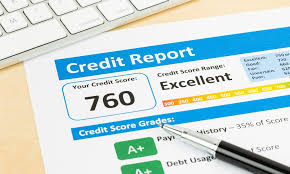

## Problem Research

Home Credit saat ini sedang menggunakan berbagai metode statistik dan teknik Machine Learning untuk membuat prediksi skor credit. Tujuan utama dari proyek ini adalah untuk meningkatkan akurasi dan efisiensi dalam menilai kelayakan kredit para pelanggan. Tantangan utama yang dihadapi adalah memastikan bahwa pelanggan yang mampu melakukan pelunasan tidak ditolak saat mengajukan pinjaman. Selain itu, penting untuk memberikan pinjaman dengan jumlah pokok, jangka waktu, dan jadwal pembayaran yang akan mendorong pelanggan untuk mencapai kesuksesan finansial.

Model Machine Learning yang digunakan yaitu Logistic Regression. Model-model ini akan digunakan untuk memprediksi skor kredit dan mengidentifikasi faktor-faktor yang mempengaruhi kemampuan pelanggan dalam melunasi pinjaman. 

# 1. Import Library dan Dataset

In [1]:
# Import library dasar untuk manipulasi dan analisis data
import pandas as pd
import numpy as np

# Import library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import plotly.express as px

# Import library untuk preprocessing dan machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import confusion_matrix
import toad
from toad.metrics import KS, AUC
from toad.plot import bin_plot, badrate_plot
from sklearn.metrics import roc_auc_score, recall_score, precision_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV
import shap

# Memastikan Jupyter Notebook menampilkan semua kolom
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Membaca file CSV yang sudah dilakukan data cleaning ke dalam DataFrame
application_train = pd.read_csv('application_train_cleaned.csv')
bureau_balance = pd.read_csv('bureau_balance_cleaned.csv')
bureau = pd.read_csv('bureau_cleaned.csv')
credit_card_balance = pd.read_csv('credit_card_balance_cleaned.csv')
installments_payments = pd.read_csv('installments_payments_cleaned.csv')
pos_cash_balance = pd.read_csv('pos_cash_balance_cleaned.csv')
previous_application = pd.read_csv('previous_application_cleaned.csv')

In [3]:
application_train

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

In [4]:
bureau_balance

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0              5715448               0      C
1              5715448              -1      C
2              5715448              -2      C
3              5715448              -3      C
4              5715448              -4      C
...                ...             ...    ...
27299920       5041336             -47      X
27299921       5041336             -48      X
27299922       5041336             -49      X
27299923       5041336             -50      X
27299924       5041336             -51      X

[27299925 rows x 3 columns]

In [5]:
bureau

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0            215354       5714462        Closed      currency 1         -497   
1            215354       5714463        Active      currency 1         -208   
2            215354       5714464        Active      currency 1         -203   
3            215354       5714465        Active      currency 1         -203   
4            215354       5714466        Active      currency 1         -629   
...             ...           ...           ...             ...          ...   
1716423      259355       5057750        Active      currency 1          -44   
1716424      100044       5057754        Closed      currency 1        -2648   
1716425      100044       5057762        Closed      currency 1        -1809   
1716426      246829       5057770        Closed      currency 1        -1878   
1716427      246829       5057778        Closed      currency 1         -463   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  CNT_CREDIT_PROLONG  \
0                         0               -153.0                   0   
1                         0               1075.0                   0   
2                         0                528.0                   0   
3                         0                  0.0                   0   
4                         0               1197.0                   0   
...                     ...                  ...                 ...   
1716423                   0                -30.0                   0   
1716424                   0              -2433.0                   0   
1716425                   0              -1628.0                   0   
1716426                   0              -1513.0                   0   
1716427                   0                  0.0                   0   

         AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_OVERDUE  \
0              91323.00                  0.0                     0.0   
1             225000.00             171342.0                     0.0   
2             464323.50                  0.0                     0.0   
3              90000.00                  0.0                     0.0   
4            2700000.00                  0.0                     0.0   
...                 ...                  ...                     ...   
1716423        11250.00              11250.0                     0.0   
1716424        38130.84                  0.0                     0.0   
1716425        15570.00                  0.0                     0.0   
1716426        36000.00                  0.0                     0.0   
1716427        22500.00                  0.0                     0.0   

             CREDIT_TYPE  DAYS_CREDIT_UPDATE  
0        Consumer credit                -131  
1            Credit card                 -20  
2        Consumer credit                 -16  
3            Credit card                 -16  
4        Consumer credit                 -21  
...                  ...                 ...  
1716423        Microloan                 -19  
1716424  Consumer credit               -2493  
1716425  Consumer credit                -967  
1716426  Consumer credit               -1508  
1716427        Microloan                -387  

[1716428 rows x 13 columns]

In [6]:
credit_card_balance

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0           2562384      378907              -6       56.970   
1           2582071      363914              -1    63975.555   
2           1740877      371185              -7    31815.225   
3           1389973      337855              -4   236572.110   
4           1891521      126868              -1   453919.455   
...             ...         ...             ...          ...   
3840307     1036507      328243              -9        0.000   
3840308     1714892      347207              -9        0.000   
3840309     1302323      215757              -9   275784.975   
3840310     1624872      430337             -10        0.000   
3840311     2411345      236760             -10        0.000   

         AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
0                         135000                       0.0   
1                          45000                    2250.0   
2                         450000                       0.0   
3                         225000                    2250.0   
4                         450000                       0.0   
...                          ...                       ...   
3840307                    45000                       0.0   
3840308                    45000                       0.0   
3840309                   585000                  270000.0   
3840310                   450000                       0.0   
3840311                   157500                       0.0   

         AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
0                       877.5                         0.0   
1                      2250.0                         0.0   
2                         0.0                         0.0   
3                      2250.0                         0.0   
4                     11547.0                         0.0   
...                       ...                         ...   
3840307                   0.0                         0.0   
3840308                   0.0                         0.0   
3840309              270000.0                         0.0   
3840310                   0.0                         0.0   
3840311                   0.0                         0.0   

         AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  \
0                           877.5                 1700.325   
1                             0.0                 2250.000   
2                             0.0                 2250.000   
3                             0.0                11795.760   
4                         11547.0                22924.890   
...                           ...                      ...   
3840307                       0.0                    0.000   
3840308                       0.0                    0.000   
3840309                       0.0                 2250.000   
3840310                       0.0                    0.000   
3840311                       0.0                    0.000   

         AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                    1800.00                   1800.000   
1                    2250.00                   2250.000   
2                    2250.00                   2250.000   
3                   11925.00                  11925.000   
4                   27000.00                  27000.000   
...                      ...                        ...   
3840307                 0.00                      0.000   
3840308              1879.11                      0.000   
3840309            375750.00                 356994.675   
3840310                 0.00                      0.000   
3840311                 0.00                      0.000   

         AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                           0.000          0.000                 0.000   
1                       60175.080      64875.555             64875.555   
2                       26926.425      31460.085             31460.085   
3           

In [7]:
installments_payments

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
0            1054186      161674                     1.0   
1            1330831      151639                     0.0   
2            2085231      193053                     2.0   
3            2452527      199697                     1.0   
4            2714724      167756                     1.0   
...              ...         ...                     ...   
13602491     2006721      442291                     1.0   
13602492     1126000      428449                     0.0   
13602493     1519070      444122                     1.0   
13602494     2784672      444977                     0.0   
13602495     2653119      423205                     1.0   

          NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
0                             6          -1180.0             -1187.0   
1                            34          -2156.0             -2156.0   
2                             1            -63.0               -63.0   
3                             3          -2418.0             -2426.0   
4                             2          -1383.0             -1366.0   
...                         ...              ...                 ...   
13602491                      3          -1311.0             -1318.0   
13602492                     12           -301.0              -302.0   
13602493                      5           -399.0              -407.0   
13602494                      4           -157.0              -157.0   
13602495                     14           -975.0              -974.0   

          AMT_INSTALMENT  AMT_PAYMENT  
0               6948.360     6948.360  
1               1716.525     1716.525  
2              25425.000    25425.000  
3              24350.130    24350.130  
4               2165.040     2160.585  
...                  ...          ...  
13602491        2934.225     2934.225  
13602492        6793.470     6750.000  
13602493        4363.830     4363.830  
13602494         373.005      373.005  
13602495       12503.385    12503.385  

[13602496 rows x 8 columns]

In [8]:
pos_cash_balance

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0            1803195      182943             -31            48.0   
1            1715348      367990             -33            36.0   
2            1784872      397406             -32            12.0   
3            1903291      269225             -35            48.0   
4            2341044      334279             -35            36.0   
...              ...         ...             ...             ...   
10001353     2448283      226558             -20             6.0   
10001354     1717234      141565             -19            12.0   
10001355     1283126      315695             -21            10.0   
10001356     1082516      450255             -22            12.0   
10001357     1259607      174278             -52            16.0   

          CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                          45.0               Active       0           0  
1                          35.0               Active       0           0  
2                           9.0               Active       0           0  
3                          42.0               Active       0           0  
4                          35.0               Active       0           0  
...                         ...                  ...     ...         ...  
10001353                    0.0               Active     843           0  
10001354                    0.0               Active     602           0  
10001355                    0.0               Active     609           0  
10001356                    0.0               Active     614           0  
10001357                    0.0            Completed       0           0  

[10001358 rows x 8 columns]

In [9]:
previous_application

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1669863     2300464      352015     Consumer loans    14704.290   
1669864     2357031      334635     Consumer loans     6622.020   
1669865     2659632      249544     Consumer loans    11520.855   
1669866     2785582      400317         Cash loans    18821.520   
1669867     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1               607500.0    679671.0               0.0         607500.0   
2               112500.0    136444.5               0.0         112500.0   
3               450000.0    470790.0               0.0         450000.0   
4               337500.0    404055.0               0.0         337500.0   
...                  ...         ...               ...              ...   
1669863         267295.5    311400.0               0.0         267295.5   
1669864          87750.0     64291.5           29250.0          87750.0   
1669865         105237.0    102523.5           10525.5         105237.0   
1669866         180000.0    191880.0               0.0         180000.0   
1669867         360000.0    360000.0               0.0         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                         SATURDAY                       15   
1                         THURSDAY                       11   
2                          TUESDAY                       11   
3                           MONDAY                        7   
4                         THURSDAY                        9   
...                            ...                      ...   
1669863                  WEDNESDAY                       12   
1669864                    TUESDAY                       15   
1669865                     MONDAY                       12   
1669866                  WEDNESDAY                        9   
1669867                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
0                                 Y                       1   
1                                 Y                       1   
2                                 Y                       1   
3                                 Y                       1   
4                                 Y                       1   
...                             ...                     ...   
1669863                           Y                       1   
1669864                           Y                       1   
1669865                           Y                       1   
1669866                           Y                       1   
1669867                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
0                 0.000000               0.182832                  0.867336   
1                 0.000000               0.000000                  0.000000   
2                 0.000000               0.000000                  0.000000   
3                 0.000000               0.000000                  0.000000   
4                 0.000000               0.000000                  0.000000   
...                    ...                    ...                       ...   
1669863           0.000000               0.000000                  0.000000   
1669864           0.340554               0.000000                  0.000000   
1669865           0.101401               0.000000                  0.000000   

# 2. Exploratory Data Analysis

## 2.1 Groupby dan Join pada data dari DataFrame

Diagram ini memberikan pandangan keseluruhan tentang bagaimana berbagai sumber data saling terhubung.

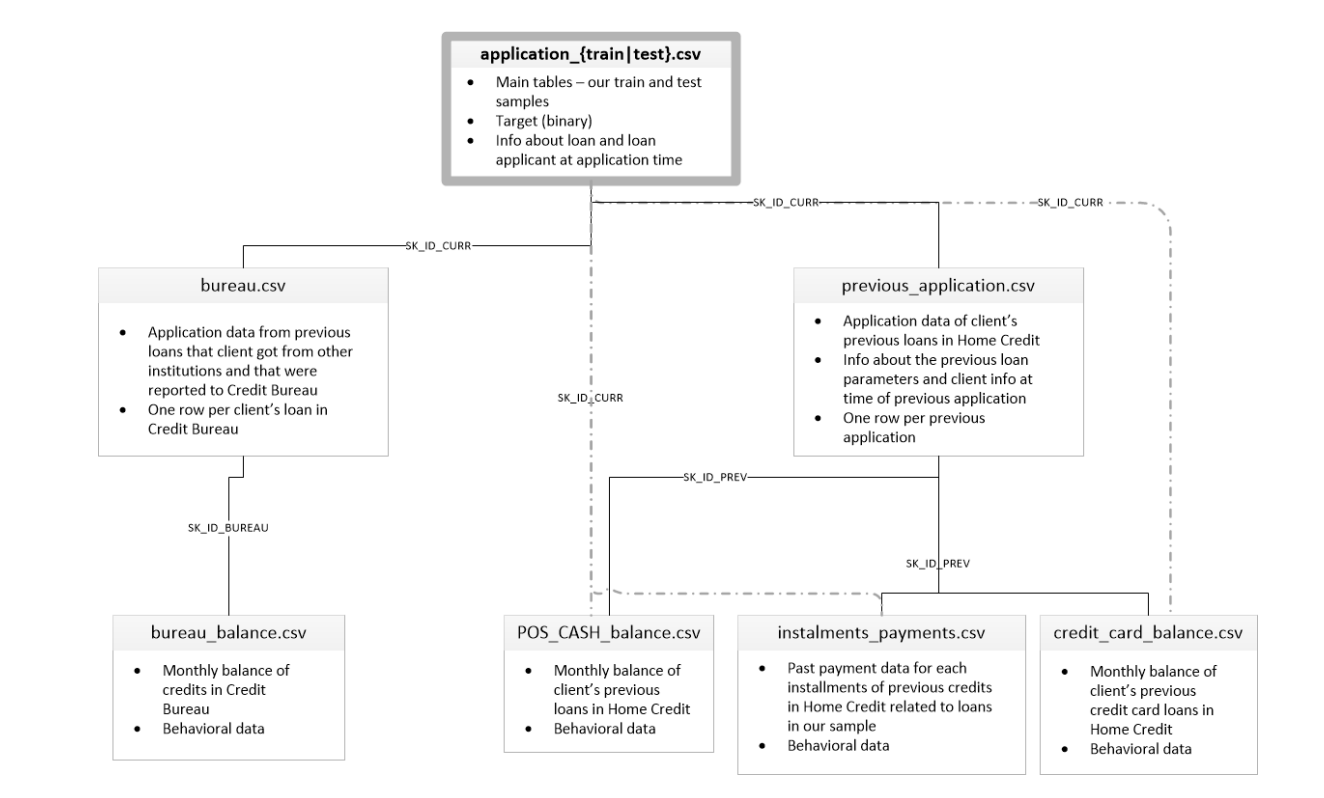

### 2.1.1 Bureau

- application_{train|test}.csv terhubung dengan bureau.csv melalui kolom SK_ID_CURR.
- bureau.csv terhubung dengan bureau_balance.csv melalui kolom SK_ID_BUREAU.

In [10]:
# Aggregasi rata-rata saldo bulanan dari bureau_balance untuk setiap ID BUREAU
bb_aggregated = bureau_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'].mean().reset_index(name='AVG_MONTHS_BALANCE')

# Gabungkan hasil groupby dengan DataFrame bureau
bureau_merged = pd.merge(bureau, bb_aggregated, on='SK_ID_BUREAU', how='left')

# Agregasi jumlah kredit saat ini dan jumlah utang saat ini pada kreditur untuk setiap ID aplikasi saat ini yang unik
bureau_aggregated = bureau_merged.groupby('SK_ID_CURR')[['AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT']].sum().reset_index()

# Melakukan join antara DataFrame 'bureau' dan 'application_train' berdasarkan kolom 'SK_ID_CURR'
bureau_application_join = pd.merge(application_train,bureau_aggregated, on='SK_ID_CURR', how='left')

In [11]:
bureau_application_join

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

### 2.1.2 Payment Installments

- previous_application.csv terhubung dengan POS_CASH_balance.csv, installments_payments.csv, dan credit_card_balance.csv melalui kolom SK_ID_PREV.

In [12]:
# Menggabungkan dan mengagregasi data pembayaran angsuran
pi_aggregated = installments_payments.groupby(['SK_ID_PREV', 'SK_ID_CURR'])[['AMT_INSTALMENT', 'AMT_PAYMENT']].sum().reset_index()

# Menghitung selisih antara pembayaran angsuran dan jumlah angsuran
pi_aggregated['DIFF_INSTALLMENT_PAYMENT'] = pi_aggregated['AMT_INSTALMENT'] - pi_aggregated['AMT_PAYMENT']

# Menghapus kolom SK_ID_CURR
pi_aggregated = pi_aggregated.drop(columns='SK_ID_CURR')

In [13]:
pi_aggregated

SK_ID_PREV  AMT_INSTALMENT  AMT_PAYMENT  DIFF_INSTALLMENT_PAYMENT
0          1000001       68443.425    68443.425                     0.000
1          1000002       37235.565    37235.565                     0.000
2          1000003       14854.050    14854.050                     0.000
3          1000004       33523.155    33523.155                     0.000
4          1000005      161735.310   147021.705                 14713.605
...            ...             ...          ...                       ...
997669     2843495      797530.185   797530.185                     0.000
997670     2843496      312334.605   304333.155                  8001.450
997671     2843497      183503.700   183503.700                     0.000
997672     2843498      414321.435   414321.435                     0.000
997673     2843499      578082.240   578082.240                     0.000

[997674 rows x 4 columns]

### 2.1.3 Previous Application

- application_{train|test}.csv terhubung dengan previous_application.csv melalui kolom SK_ID_CURR.

In [14]:
# Menggabungkan data angsuran dengan aplikasi sebelumnya
previous_installments = pd.merge(previous_application, pi_aggregated, on='SK_ID_PREV', how='left')

In [15]:
previous_installments

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1669863     2300464      352015     Consumer loans    14704.290   
1669864     2357031      334635     Consumer loans     6622.020   
1669865     2659632      249544     Consumer loans    11520.855   
1669866     2785582      400317         Cash loans    18821.520   
1669867     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1               607500.0    679671.0               0.0         607500.0   
2               112500.0    136444.5               0.0         112500.0   
3               450000.0    470790.0               0.0         450000.0   
4               337500.0    404055.0               0.0         337500.0   
...                  ...         ...               ...              ...   
1669863         267295.5    311400.0               0.0         267295.5   
1669864          87750.0     64291.5           29250.0          87750.0   
1669865         105237.0    102523.5           10525.5         105237.0   
1669866         180000.0    191880.0               0.0         180000.0   
1669867         360000.0    360000.0               0.0         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                         SATURDAY                       15   
1                         THURSDAY                       11   
2                          TUESDAY                       11   
3                           MONDAY                        7   
4                         THURSDAY                        9   
...                            ...                      ...   
1669863                  WEDNESDAY                       12   
1669864                    TUESDAY                       15   
1669865                     MONDAY                       12   
1669866                  WEDNESDAY                        9   
1669867                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
0                                 Y                       1   
1                                 Y                       1   
2                                 Y                       1   
3                                 Y                       1   
4                                 Y                       1   
...                             ...                     ...   
1669863                           Y                       1   
1669864                           Y                       1   
1669865                           Y                       1   
1669866                           Y                       1   
1669867                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
0                 0.000000               0.182832                  0.867336   
1                 0.000000               0.000000                  0.000000   
2                 0.000000               0.000000                  0.000000   
3                 0.000000               0.000000                  0.000000   
4                 0.000000               0.000000                  0.000000   
...                    ...                    ...                       ...   
1669863           0.000000               0.000000                  0.000000   
1669864           0.340554               0.000000                  0.000000   
1669865           0.101401               0.000000                  0.000000   

### 2.1.4 Credit Card Balance

In [16]:
# Mengelompokkan dan menjumlahkahkan data (Aggregation)
ccb_aggregated = credit_card_balance.groupby('SK_ID_PREV')[['AMT_BALANCE', 'AMT_PAYMENT_TOTAL_CURRENT']].sum().reset_index()

#Menggabungkan dua DataFrame (prev_installments dan ccb_agg) berdasarkan kolom SK_ID_PREV.
previous_ccb = pd.merge(previous_installments, ccb_aggregated, on='SK_ID_PREV', how='left')


In [17]:
previous_ccb

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1669863     2300464      352015     Consumer loans    14704.290   
1669864     2357031      334635     Consumer loans     6622.020   
1669865     2659632      249544     Consumer loans    11520.855   
1669866     2785582      400317         Cash loans    18821.520   
1669867     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1               607500.0    679671.0               0.0         607500.0   
2               112500.0    136444.5               0.0         112500.0   
3               450000.0    470790.0               0.0         450000.0   
4               337500.0    404055.0               0.0         337500.0   
...                  ...         ...               ...              ...   
1669863         267295.5    311400.0               0.0         267295.5   
1669864          87750.0     64291.5           29250.0          87750.0   
1669865         105237.0    102523.5           10525.5         105237.0   
1669866         180000.0    191880.0               0.0         180000.0   
1669867         360000.0    360000.0               0.0         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                         SATURDAY                       15   
1                         THURSDAY                       11   
2                          TUESDAY                       11   
3                           MONDAY                        7   
4                         THURSDAY                        9   
...                            ...                      ...   
1669863                  WEDNESDAY                       12   
1669864                    TUESDAY                       15   
1669865                     MONDAY                       12   
1669866                  WEDNESDAY                        9   
1669867                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
0                                 Y                       1   
1                                 Y                       1   
2                                 Y                       1   
3                                 Y                       1   
4                                 Y                       1   
...                             ...                     ...   
1669863                           Y                       1   
1669864                           Y                       1   
1669865                           Y                       1   
1669866                           Y                       1   
1669867                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
0                 0.000000               0.182832                  0.867336   
1                 0.000000               0.000000                  0.000000   
2                 0.000000               0.000000                  0.000000   
3                 0.000000               0.000000                  0.000000   
4                 0.000000               0.000000                  0.000000   
...                    ...                    ...                       ...   
1669863           0.000000               0.000000                  0.000000   
1669864           0.340554               0.000000                  0.000000   
1669865           0.101401               0.000000                  0.000000   

### 2.1.5 Pos Cash Balance

In [18]:
# Mengelompokkan data pos_cash berdasarkan 'SK_ID_PREV' dan menghitung rata-rata 'SK_DPD' untuk setiap grup
pc_aggregated = pos_cash_balance.groupby('SK_ID_PREV')['SK_DPD'].mean().reset_index(name='AVERAGE_DPD')

# Mengganti nama variabel merged_data menjadi data_with_avg_dpd
previous_pc = pd.merge(previous_ccb, pc_aggregated, on='SK_ID_PREV', how='left')

In [19]:
previous_pc

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1669863     2300464      352015     Consumer loans    14704.290   
1669864     2357031      334635     Consumer loans     6622.020   
1669865     2659632      249544     Consumer loans    11520.855   
1669866     2785582      400317         Cash loans    18821.520   
1669867     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1               607500.0    679671.0               0.0         607500.0   
2               112500.0    136444.5               0.0         112500.0   
3               450000.0    470790.0               0.0         450000.0   
4               337500.0    404055.0               0.0         337500.0   
...                  ...         ...               ...              ...   
1669863         267295.5    311400.0               0.0         267295.5   
1669864          87750.0     64291.5           29250.0          87750.0   
1669865         105237.0    102523.5           10525.5         105237.0   
1669866         180000.0    191880.0               0.0         180000.0   
1669867         360000.0    360000.0               0.0         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                         SATURDAY                       15   
1                         THURSDAY                       11   
2                          TUESDAY                       11   
3                           MONDAY                        7   
4                         THURSDAY                        9   
...                            ...                      ...   
1669863                  WEDNESDAY                       12   
1669864                    TUESDAY                       15   
1669865                     MONDAY                       12   
1669866                  WEDNESDAY                        9   
1669867                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
0                                 Y                       1   
1                                 Y                       1   
2                                 Y                       1   
3                                 Y                       1   
4                                 Y                       1   
...                             ...                     ...   
1669863                           Y                       1   
1669864                           Y                       1   
1669865                           Y                       1   
1669866                           Y                       1   
1669867                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
0                 0.000000               0.182832                  0.867336   
1                 0.000000               0.000000                  0.000000   
2                 0.000000               0.000000                  0.000000   
3                 0.000000               0.000000                  0.000000   
4                 0.000000               0.000000                  0.000000   
...                    ...                    ...                       ...   
1669863           0.000000               0.000000                  0.000000   
1669864           0.340554               0.000000                  0.000000   
1669865           0.101401               0.000000                  0.000000   

### 2.1.6 Menggabungkan bureau dengan previous applications

In [20]:
# Menggabungkan bureau_application_join dengan previous_pc
df_train = pd.merge(bureau_application_join, previous_pc, on='SK_ID_CURR', how='left', suffixes=('_curr', '_prev'))

In [21]:
df_train

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_curr CODE_GENDER FLAG_OWN_CAR  \
0            100002       1              Cash loans           M            N   
1            100003       0              Cash loans           F            N   
2            100003       0              Cash loans           F            N   
3            100003       0              Cash loans           F            N   
4            100004       0         Revolving loans           M            Y   
...             ...     ...                     ...         ...          ...   
1429837      456255       0              Cash loans           F            N   
1429838      456255       0              Cash loans           F            N   
1429839      456255       0              Cash loans           F            N   
1429840      456255       0              Cash loans           F            N   
1429841      456255       0              Cash loans           F            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_curr  \
0                     Y             0          202500.0         406597.5   
1                     N             0          270000.0        1293502.5   
2                     N             0          270000.0        1293502.5   
3                     N             0          270000.0        1293502.5   
4                     Y             0           67500.0         135000.0   
...                 ...           ...               ...              ...   
1429837               N             0          157500.0         675000.0   
1429838               N             0          157500.0         675000.0   
1429839               N             0          157500.0         675000.0   
1429840               N             0          157500.0         675000.0   
1429841               N             0          157500.0         675000.0   

         AMT_ANNUITY_curr  AMT_GOODS_PRICE_curr NAME_TYPE_SUITE_curr  \
0                 24700.5              351000.0        Unaccompanied   
1                 35698.5             1129500.0               Family   
2                 35698.5             1129500.0               Family   
3                 35698.5             1129500.0               Family   
4                  6750.0              135000.0        Unaccompanied   
...                   ...                   ...                  ...   
1429837           49117.5              675000.0        Unaccompanied   
1429838           49117.5              675000.0        Unaccompanied   
1429839           49117.5              675000.0        Unaccompanied   
1429840           49117.5              675000.0        Unaccompanied   
1429841           49117.5              675000.0        Unaccompanied   

             NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0                     Working  Secondary / secondary special   
1               State servant               Higher education   
2               State servant               Higher education   
3               State servant               Higher education   
4                     Working  Secondary / secondary special   
...                       ...                            ...   
1429837  Commercial associate               Higher education   
1429838  Commercial associate               Higher education   
1429839  Commercial associate               Higher education   
1429840  Commercial associate               Higher education   
1429841  Commercial associate               Higher education   

           NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0        Single / not married  House / apartment                    0.018801   
1                     Married  House / apartment                    0.003541   
2                     Married  House / apartment                    0.003541   
3                     Married  House / apartment                    0.003541   
4        Single / not married  House / apartment                    0.010032   
...                  

## 2.2 Data Pre-Processing

### 2.2.1 Info dan Statistik Dasar dari DataFrame

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429842 entries, 0 to 1429841
Data columns (total 89 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   SK_ID_CURR                       1429842 non-null  int64  
 1   TARGET                           1429842 non-null  int64  
 2   NAME_CONTRACT_TYPE_curr          1429842 non-null  object 
 3   CODE_GENDER                      1429842 non-null  object 
 4   FLAG_OWN_CAR                     1429842 non-null  object 
 5   FLAG_OWN_REALTY                  1429842 non-null  object 
 6   CNT_CHILDREN                     1429842 non-null  int64  
 7   AMT_INCOME_TOTAL                 1429842 non-null  float64
 8   AMT_CREDIT_curr                  1429842 non-null  float64
 9   AMT_ANNUITY_curr                 1429842 non-null  float64
 10  AMT_GOODS_PRICE_curr             1429842 non-null  float64
 11  NAME_TYPE_SUITE_curr             1429842 non-null 

In [23]:
#Statistik dasar untuk semua kolom numerik
df_train.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  1.429842e+06  1.429842e+06  1.429842e+06      1.429842e+06   
mean   2.784722e+05  8.621722e-02  4.038593e-01      1.736061e+05   
std    1.028027e+05  2.806846e-01  7.164843e-01      1.983477e+05   
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e+04   
25%    1.893620e+05  0.000000e+00  0.000000e+00      1.125000e+05   
50%    2.789590e+05  0.000000e+00  0.000000e+00      1.575000e+05   
75%    3.675110e+05  0.000000e+00  1.000000e+00      2.115000e+05   
max    4.562550e+05  1.000000e+00  1.900000e+01      1.170000e+08   

       AMT_CREDIT_curr  AMT_ANNUITY_curr  AMT_GOODS_PRICE_curr  \
count     1.429842e+06      1.429842e+06          1.429842e+06   
mean      5.893596e+05      2.704081e+04          5.290121e+05   
std       3.874281e+05      1.404159e+04          3.559794e+05   
min       4.500000e+04      0.000000e+00          0.000000e+00   
25%       2.700000e+05      1.679850e+04          2.385000e+05   
50%       5.084955e+05      2.491650e+04          4.500000e+05   
75%       8.086500e+05      3.457350e+04          6.795000e+05   
max       4.050000e+06      2.580255e+05          4.050000e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
count                1.429842e+06  1.429842e+06   1.429842e+06   
mean                 2.079100e-02 -1.631539e+04   6.861241e+04   
std                  1.339836e-02  4.346774e+03   1.452049e+05   
min                  2.900000e-04 -2.522900e+04  -1.791200e+04   
25%                  1.003200e-02 -1.997500e+04  -2.825000e+03   
50%                  1.885000e-02 -1.603800e+04  -1.277000e+03   
75%                  2.866300e-02 -1.273000e+04  -2.820000e+02   
max                  7.250800e-02 -7.489000e+03   3.652430e+05   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    FLAG_MOBIL  FLAG_EMP_PHONE  \
count       1.429842e+06     1.429842e+06  1.429842e+06    1.429842e+06   
mean       -5.001514e+03    -3.034569e+03  9.999993e-01    8.066891e-01   
std         3.551694e+03     1.507172e+03  8.362882e-04    3.948948e-01   
min        -2.467200e+04    -7.197000e+03  0.000000e+00    0.000000e+00   
25%        -7.509000e+03    -4.319000e+03  1.000000e+00    1.000000e+00   
50%        -4.506000e+03    -3.330000e+03  1.000000e+00    1.000000e+00   
75%        -1.997000e+03    -1.783000e+03  1.000000e+00    1.000000e+00   
max         0.000000e+00     0.000000e+00  1.000000e+00    1.000000e+00   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE    FLAG_PHONE    FLAG_EMAIL  \
count     1.429842e+06      1.429842e+06  1.429842e+06  1.429842e+06   
mean      1.824495e-01      9.989915e-01  2.825753e-01  7.195340e-02   
std       3.862147e-01      3.174093e-02  4.502517e-01  2.584108e-01   
min       0.000000e+00      0.000000e+00  0.000000e+00  0.000000e+00   
25%       0.000000e+00      1.000000e+00  0.000000e+00  0.000000e+00   
50%       0.000000e+00      1.000000e+00  0.000000e+00  0.000000e+00   
75%       0.000000e+00      1.000000e+00  1.000000e+00  0.000000e+00   
max       1.000000e+00      1.000000e+00  1.000000e+00  1.000000e+00   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count     1.429842e+06          1.429842e+06                 1.429842e+06   
mean      2.148987e+00          2.058183e+00                 2.036176e+00   
std       9.001299e-01          4.963445e-01                 4.891543e-01   
min       0.000000e+00          1.000000e+00                 1.000000e+00   
25%       2.000000e+00          2.000000e+00                 2.000000e+00   
50%       2.000000e+00          2.000000e+00                 2.000000e+00   
75%       3.000000e+00          2.000000e+00                 2.000000e+00   
max       2.000000e+01          3.000000e+00                 3.000000e+00   

       HOUR_APPR_PROCESS_START_curr  REG_REGION_NOT_LIVE_REGION  \
count                  1.429842e+06                1.429842e+06   
mean                   1.199399e+01         

In [24]:
#Statistik dasar untuk semua kolom kategorikal
df_train.describe(include= 'O')

NAME_CONTRACT_TYPE_curr CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count                  1429842     1429842      1429842         1429842   
unique                       2           3            2               2   
top                 Cash loans           F            N               Y   
freq                   1320385      964634       947337         1031438   

       NAME_TYPE_SUITE_curr NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count               1429842          1429842                        1429842   
unique                    7                8                              5   
top           Unaccompanied          Working  Secondary / secondary special   
freq                1171046           730400                        1046586   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE WEEKDAY_APPR_PROCESS_START_curr  \
count             1429842            1429842                         1429842   
unique                  6                  6                               7   
top               Married  House / apartment                         TUESDAY   
freq               920856            1279490                          251461   

             ORGANIZATION_TYPE NAME_CONTRACT_TYPE_prev  \
count                  1429842                 1413388   
unique                      58                       3   
top     Business Entity Type 3              Cash loans   
freq                    308841                  626764   

       WEEKDAY_APPR_PROCESS_START_prev FLAG_LAST_APPL_PER_CONTRACT  \
count                          1413388                     1413388   
unique                               7                           2   
top                          WEDNESDAY                           Y   
freq                            215470                     1406074   

       NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE  \
count                 1413388              1413388                1413388   
unique                     25                    4                      4   
top                       XAP             Approved  Cash through the bank   
freq                   786624               886099                 882700   

       CODE_REJECT_REASON NAME_TYPE_SUITE_prev NAME_CLIENT_TYPE  \
count             1413388              1413388          1413388   
unique                  9                    8                4   
top                   XAP                    0         Repeater   
freq              1145249               694359          1037412   

       NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
count              1413388        1413388           1413388   
unique                  27              5                 3   
top                    XNA            POS               XNA   
freq                796896         592460            899740   

                   CHANNEL_TYPE NAME_SELLER_INDUSTRY NAME_YIELD_GROUP  \
count                   1413388              1413388          1413388   
unique                        8                   11                5   
top     Credit and cash offices                  XNA              XNA   
freq                     600339               715318           428885   

       PRODUCT_COMBINATION  
count              1413388  
unique                  17  
top                   Cash  
freq                235101

### 2.2.2 Fixing XNA Value pada df_train

In [25]:
df_train

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_curr CODE_GENDER FLAG_OWN_CAR  \
0            100002       1              Cash loans           M            N   
1            100003       0              Cash loans           F            N   
2            100003       0              Cash loans           F            N   
3            100003       0              Cash loans           F            N   
4            100004       0         Revolving loans           M            Y   
...             ...     ...                     ...         ...          ...   
1429837      456255       0              Cash loans           F            N   
1429838      456255       0              Cash loans           F            N   
1429839      456255       0              Cash loans           F            N   
1429840      456255       0              Cash loans           F            N   
1429841      456255       0              Cash loans           F            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_curr  \
0                     Y             0          202500.0         406597.5   
1                     N             0          270000.0        1293502.5   
2                     N             0          270000.0        1293502.5   
3                     N             0          270000.0        1293502.5   
4                     Y             0           67500.0         135000.0   
...                 ...           ...               ...              ...   
1429837               N             0          157500.0         675000.0   
1429838               N             0          157500.0         675000.0   
1429839               N             0          157500.0         675000.0   
1429840               N             0          157500.0         675000.0   
1429841               N             0          157500.0         675000.0   

         AMT_ANNUITY_curr  AMT_GOODS_PRICE_curr NAME_TYPE_SUITE_curr  \
0                 24700.5              351000.0        Unaccompanied   
1                 35698.5             1129500.0               Family   
2                 35698.5             1129500.0               Family   
3                 35698.5             1129500.0               Family   
4                  6750.0              135000.0        Unaccompanied   
...                   ...                   ...                  ...   
1429837           49117.5              675000.0        Unaccompanied   
1429838           49117.5              675000.0        Unaccompanied   
1429839           49117.5              675000.0        Unaccompanied   
1429840           49117.5              675000.0        Unaccompanied   
1429841           49117.5              675000.0        Unaccompanied   

             NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0                     Working  Secondary / secondary special   
1               State servant               Higher education   
2               State servant               Higher education   
3               State servant               Higher education   
4                     Working  Secondary / secondary special   
...                       ...                            ...   
1429837  Commercial associate               Higher education   
1429838  Commercial associate               Higher education   
1429839  Commercial associate               Higher education   
1429840  Commercial associate               Higher education   
1429841  Commercial associate               Higher education   

           NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0        Single / not married  House / apartment                    0.018801   
1                     Married  House / apartment                    0.003541   
2                     Married  House / apartment                    0.003541   
3                     Married  House / apartment                    0.003541   
4        Single / not married  House / apartment                    0.010032   
...                  

In [26]:
# Loop melalui setiap kolom dan mencetak nilai unik beserta jumlah kemunculannya jika nilai 'XNA' tidak 0
for col in df_train.columns:
    xna_count = df_train[col].value_counts().get('XNA', 0)  # Mendapatkan jumlah kemunculan nilai 'XNA', jika tidak ada, kembalikan 0
    if xna_count != 0:
        print(f"Kolom '{col}': Jumlah nilai 'XNA' = {xna_count}")

Kolom 'CODE_GENDER': Jumlah nilai 'XNA' = 55
Kolom 'ORGANIZATION_TYPE': Jumlah nilai 'XNA' = 276348
Kolom 'NAME_CASH_LOAN_PURPOSE': Jumlah nilai 'XNA' = 567351
Kolom 'NAME_PAYMENT_TYPE': Jumlah nilai 'XNA' = 522647
Kolom 'CODE_REJECT_REASON': Jumlah nilai 'XNA' = 4376
Kolom 'NAME_CLIENT_TYPE': Jumlah nilai 'XNA' = 1543
Kolom 'NAME_GOODS_CATEGORY': Jumlah nilai 'XNA' = 796896
Kolom 'NAME_PORTFOLIO': Jumlah nilai 'XNA' = 306900
Kolom 'NAME_PRODUCT_TYPE': Jumlah nilai 'XNA' = 899740
Kolom 'NAME_SELLER_INDUSTRY': Jumlah nilai 'XNA' = 715318
Kolom 'NAME_YIELD_GROUP': Jumlah nilai 'XNA' = 428885


In [27]:
# Menghitung jumlah nilai tidak dikenal dalam kolom NAME_GOODS_CATEGORY
xna_ngc = df_train['NAME_GOODS_CATEGORY'].value_counts().get('XNA', 0)

# Menghitung jumlah nilai tidak dikenal dalam kolom NAME_CLIENT_TYPE
xna_nct = df_train['NAME_CLIENT_TYPE'].value_counts().get('XNA', 0)

# Menghitung total jumlah data
total_data = len(df_train)

# Menghitung proporsi nilai tidak dikenal dalam kolom NAME_GOODS_CATEGORY
xna_ngc_proportion = (xna_ngc / total_data) * 100

# Menghitung proporsi nilai tidak dikenal dalam kolom NAME_CLIENT_TYPE
xna_nct_proportion = (xna_nct / total_data) * 100

# Menampilkan hasil
print(f'Proportion of unknown values in NAME_GOODS_CATEGORY: {round(xna_ngc_proportion, 2)}%')
print(f'Proportion of unknown values in NAME_CLIENT_TYPE: {round(xna_nct_proportion, 2)}%')

Proportion of unknown values in NAME_GOODS_CATEGORY: 55.73%
Proportion of unknown values in NAME_CLIENT_TYPE: 0.11%


In [28]:
df1_train = df_train.copy()

In [29]:
# Pengelompokkan nilai kategorikal pada df1_train untuk kolom 'AGE'
df1_train['AGE'] = round(abs(df1_train['DAYS_BIRTH'] / 365.25)).astype(int)

# Pengelompokkan berdasarkan usia
age_group = [
    (df1_train['AGE']>20) & (df1_train['AGE']<=30),
    (df1_train['AGE']>30) & (df1_train['AGE']<=40),
    (df1_train['AGE']>40) & (df1_train['AGE']<=50),
    (df1_train['AGE']>50) & (df1_train['AGE']<=60),
    (df1_train['AGE']>60) & (df1_train['AGE']<=70),
]
age_con = ['Twenty', 'Thirty', 'Forty', 'Fifty', 'Sixty']

# Create the AGE_GROUP column with ordered categories
df1_train['AGE_GROUP'] = pd.Categorical(np.select(age_group, age_con), categories=age_con, ordered=True)


In [30]:
df1_train['AGE_GROUP'].unique()

['Twenty', 'Forty', 'Fifty', 'Thirty', 'Sixty']
Categories (5, object): ['Twenty' < 'Thirty' < 'Forty' < 'Fifty' < 'Sixty']

In [31]:
# Buang baris dengan 'NAME_FAMILY_STATUS' yang sama dengan 'Unknown'
df1_train = df1_train[df1_train['NAME_FAMILY_STATUS'] != 'Unknown']

# Ganti nilai 'XNA' dan 'XAP' dengan NaN di semua kolom tipe objek
df1_train = df1_train.replace(['XNA', 'XAP'], np.nan)

# Ganti nilai yang tidak wajar di kolom 'CNT_FAM_MEMBERS'
df1_train['CNT_FAM_MEMBERS'].replace({4.5: 5, 0.5: 1}, inplace=True)

### 2.2.3 Menghapus Duplicate Values

In [32]:
df1_train.duplicated().sum()

0

Tidak terdapat duplicated values

### 2.2.4 Memeriksa dan Mengatasi Missing Values

In [33]:
df1_train

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_curr CODE_GENDER FLAG_OWN_CAR  \
0            100002       1              Cash loans           M            N   
1            100003       0              Cash loans           F            N   
2            100003       0              Cash loans           F            N   
3            100003       0              Cash loans           F            N   
4            100004       0         Revolving loans           M            Y   
...             ...     ...                     ...         ...          ...   
1429837      456255       0              Cash loans           F            N   
1429838      456255       0              Cash loans           F            N   
1429839      456255       0              Cash loans           F            N   
1429840      456255       0              Cash loans           F            N   
1429841      456255       0              Cash loans           F            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_curr  \
0                     Y             0          202500.0         406597.5   
1                     N             0          270000.0        1293502.5   
2                     N             0          270000.0        1293502.5   
3                     N             0          270000.0        1293502.5   
4                     Y             0           67500.0         135000.0   
...                 ...           ...               ...              ...   
1429837               N             0          157500.0         675000.0   
1429838               N             0          157500.0         675000.0   
1429839               N             0          157500.0         675000.0   
1429840               N             0          157500.0         675000.0   
1429841               N             0          157500.0         675000.0   

         AMT_ANNUITY_curr  AMT_GOODS_PRICE_curr NAME_TYPE_SUITE_curr  \
0                 24700.5              351000.0        Unaccompanied   
1                 35698.5             1129500.0               Family   
2                 35698.5             1129500.0               Family   
3                 35698.5             1129500.0               Family   
4                  6750.0              135000.0        Unaccompanied   
...                   ...                   ...                  ...   
1429837           49117.5              675000.0        Unaccompanied   
1429838           49117.5              675000.0        Unaccompanied   
1429839           49117.5              675000.0        Unaccompanied   
1429840           49117.5              675000.0        Unaccompanied   
1429841           49117.5              675000.0        Unaccompanied   

             NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0                     Working  Secondary / secondary special   
1               State servant               Higher education   
2               State servant               Higher education   
3               State servant               Higher education   
4                     Working  Secondary / secondary special   
...                       ...                            ...   
1429837  Commercial associate               Higher education   
1429838  Commercial associate               Higher education   
1429839  Commercial associate               Higher education   
1429840  Commercial associate               Higher education   
1429841  Commercial associate               Higher education   

           NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0        Single / not married  House / apartment                    0.018801   
1                     Married  House / apartment                    0.003541   
2                     Married  House / apartment                    0.003541   
3                     Married  House / apartment                    0.003541   
4        Single / not married  House / apartment                    0.010032   
...                  

In [34]:
df1_train.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE_curr            0
CODE_GENDER                       55
FLAG_OWN_CAR                       0
                              ...   
AMT_BALANCE                  1351555
AMT_PAYMENT_TOTAL_CURRENT    1351555
AVERAGE_DPD                   660226
AGE                                0
AGE_GROUP                          0
Length: 91, dtype: int64

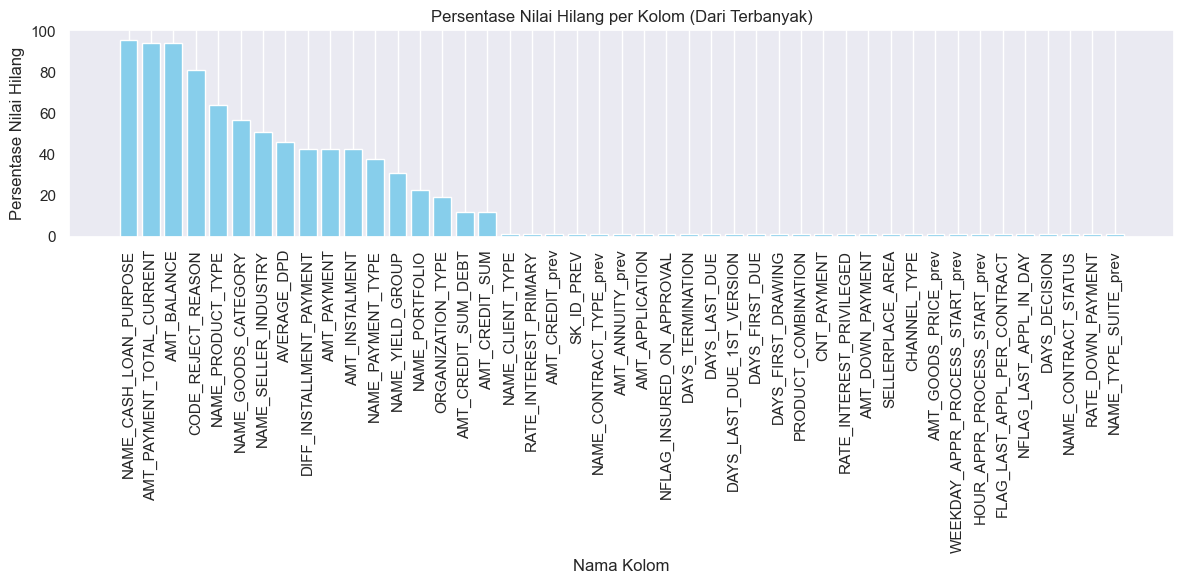

In [35]:
# Hitung jumlah nilai yang hilang dalam setiap kolom dan konversikan ke dalam persentase
missing_percentage = (df1_train.isna().sum() / len(df1_train)) * 100

# Bulatkan persentase menjadi dua angka di belakang koma
missing_percentage = missing_percentage.round(2)

# Filter hanya kolom dengan nilai yang hilang tidak nol
missing_percentage_filtered = missing_percentage[missing_percentage != 0]

# Urutkan persentase nilai yang hilang dari yang terbesar ke yang terkecil
missing_percentage_filtered = missing_percentage_filtered.sort_values(ascending=False)

# Buat plot
plt.figure(figsize=(12, 6))
plt.bar(missing_percentage_filtered.index, missing_percentage_filtered.values, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Nama Kolom')
plt.ylabel('Persentase Nilai Hilang')
plt.title('Persentase Nilai Hilang per Kolom (Dari Terbanyak)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [36]:
missing_percentage_filtered

NAME_CASH_LOAN_PURPOSE             95.84
AMT_PAYMENT_TOTAL_CURRENT          94.52
AMT_BALANCE                        94.52
CODE_REJECT_REASON                 81.55
NAME_PRODUCT_TYPE                  64.08
NAME_GOODS_CATEGORY                56.88
NAME_SELLER_INDUSTRY               51.18
AVERAGE_DPD                        46.17
DIFF_INSTALLMENT_PAYMENT           42.61
AMT_PAYMENT                        42.61
AMT_INSTALMENT                     42.61
NAME_PAYMENT_TYPE                  37.70
NAME_YIELD_GROUP                   31.15
NAME_PORTFOLIO                     22.61
ORGANIZATION_TYPE                  19.33
AMT_CREDIT_SUM_DEBT                12.27
AMT_CREDIT_SUM                     12.27
NAME_CLIENT_TYPE                    1.26
RATE_INTEREST_PRIMARY               1.15
AMT_CREDIT_prev                     1.15
SK_ID_PREV                          1.15
NAME_CONTRACT_TYPE_prev             1.15
AMT_ANNUITY_prev                    1.15
AMT_APPLICATION                     1.15
NFLAG_INSURED_ON

- Dataset df_train memiliki banyak nilai yang hilang (missing values)
- Melakukan penghapusan pada kolom yang memiliki missing value >90%

### 2.2.5 Memeriksa dan Memperbaiki Data Outlier untuk kolom numerikal

In [37]:
df1_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1429840 entries, 0 to 1429841
Data columns (total 91 columns):
 #   Column                           Non-Null Count    Dtype   
---  ------                           --------------    -----   
 0   SK_ID_CURR                       1429840 non-null  int64   
 1   TARGET                           1429840 non-null  int64   
 2   NAME_CONTRACT_TYPE_curr          1429840 non-null  object  
 3   CODE_GENDER                      1429785 non-null  object  
 4   FLAG_OWN_CAR                     1429840 non-null  object  
 5   FLAG_OWN_REALTY                  1429840 non-null  object  
 6   CNT_CHILDREN                     1429840 non-null  int64   
 7   AMT_INCOME_TOTAL                 1429840 non-null  float64 
 8   AMT_CREDIT_curr                  1429840 non-null  float64 
 9   AMT_ANNUITY_curr                 1429840 non-null  float64 
 10  AMT_GOODS_PRICE_curr             1429840 non-null  float64 
 11  NAME_TYPE_SUITE_curr             1429840 n

In [38]:
numeric_info = df1_train.select_dtypes(include='number').info()
numeric_info

<class 'pandas.core.frame.DataFrame'>
Index: 1429840 entries, 0 to 1429841
Data columns (total 63 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SK_ID_CURR                    1429840 non-null  int64  
 1   TARGET                        1429840 non-null  int64  
 2   CNT_CHILDREN                  1429840 non-null  int64  
 3   AMT_INCOME_TOTAL              1429840 non-null  float64
 4   AMT_CREDIT_curr               1429840 non-null  float64
 5   AMT_ANNUITY_curr              1429840 non-null  float64
 6   AMT_GOODS_PRICE_curr          1429840 non-null  float64
 7   REGION_POPULATION_RELATIVE    1429840 non-null  float64
 8   DAYS_BIRTH                    1429840 non-null  int64  
 9   DAYS_EMPLOYED                 1429840 non-null  int64  
 10  DAYS_REGISTRATION             1429840 non-null  float64
 11  DAYS_ID_PUBLISH               1429840 non-null  int64  
 12  FLAG_MOBIL                    142

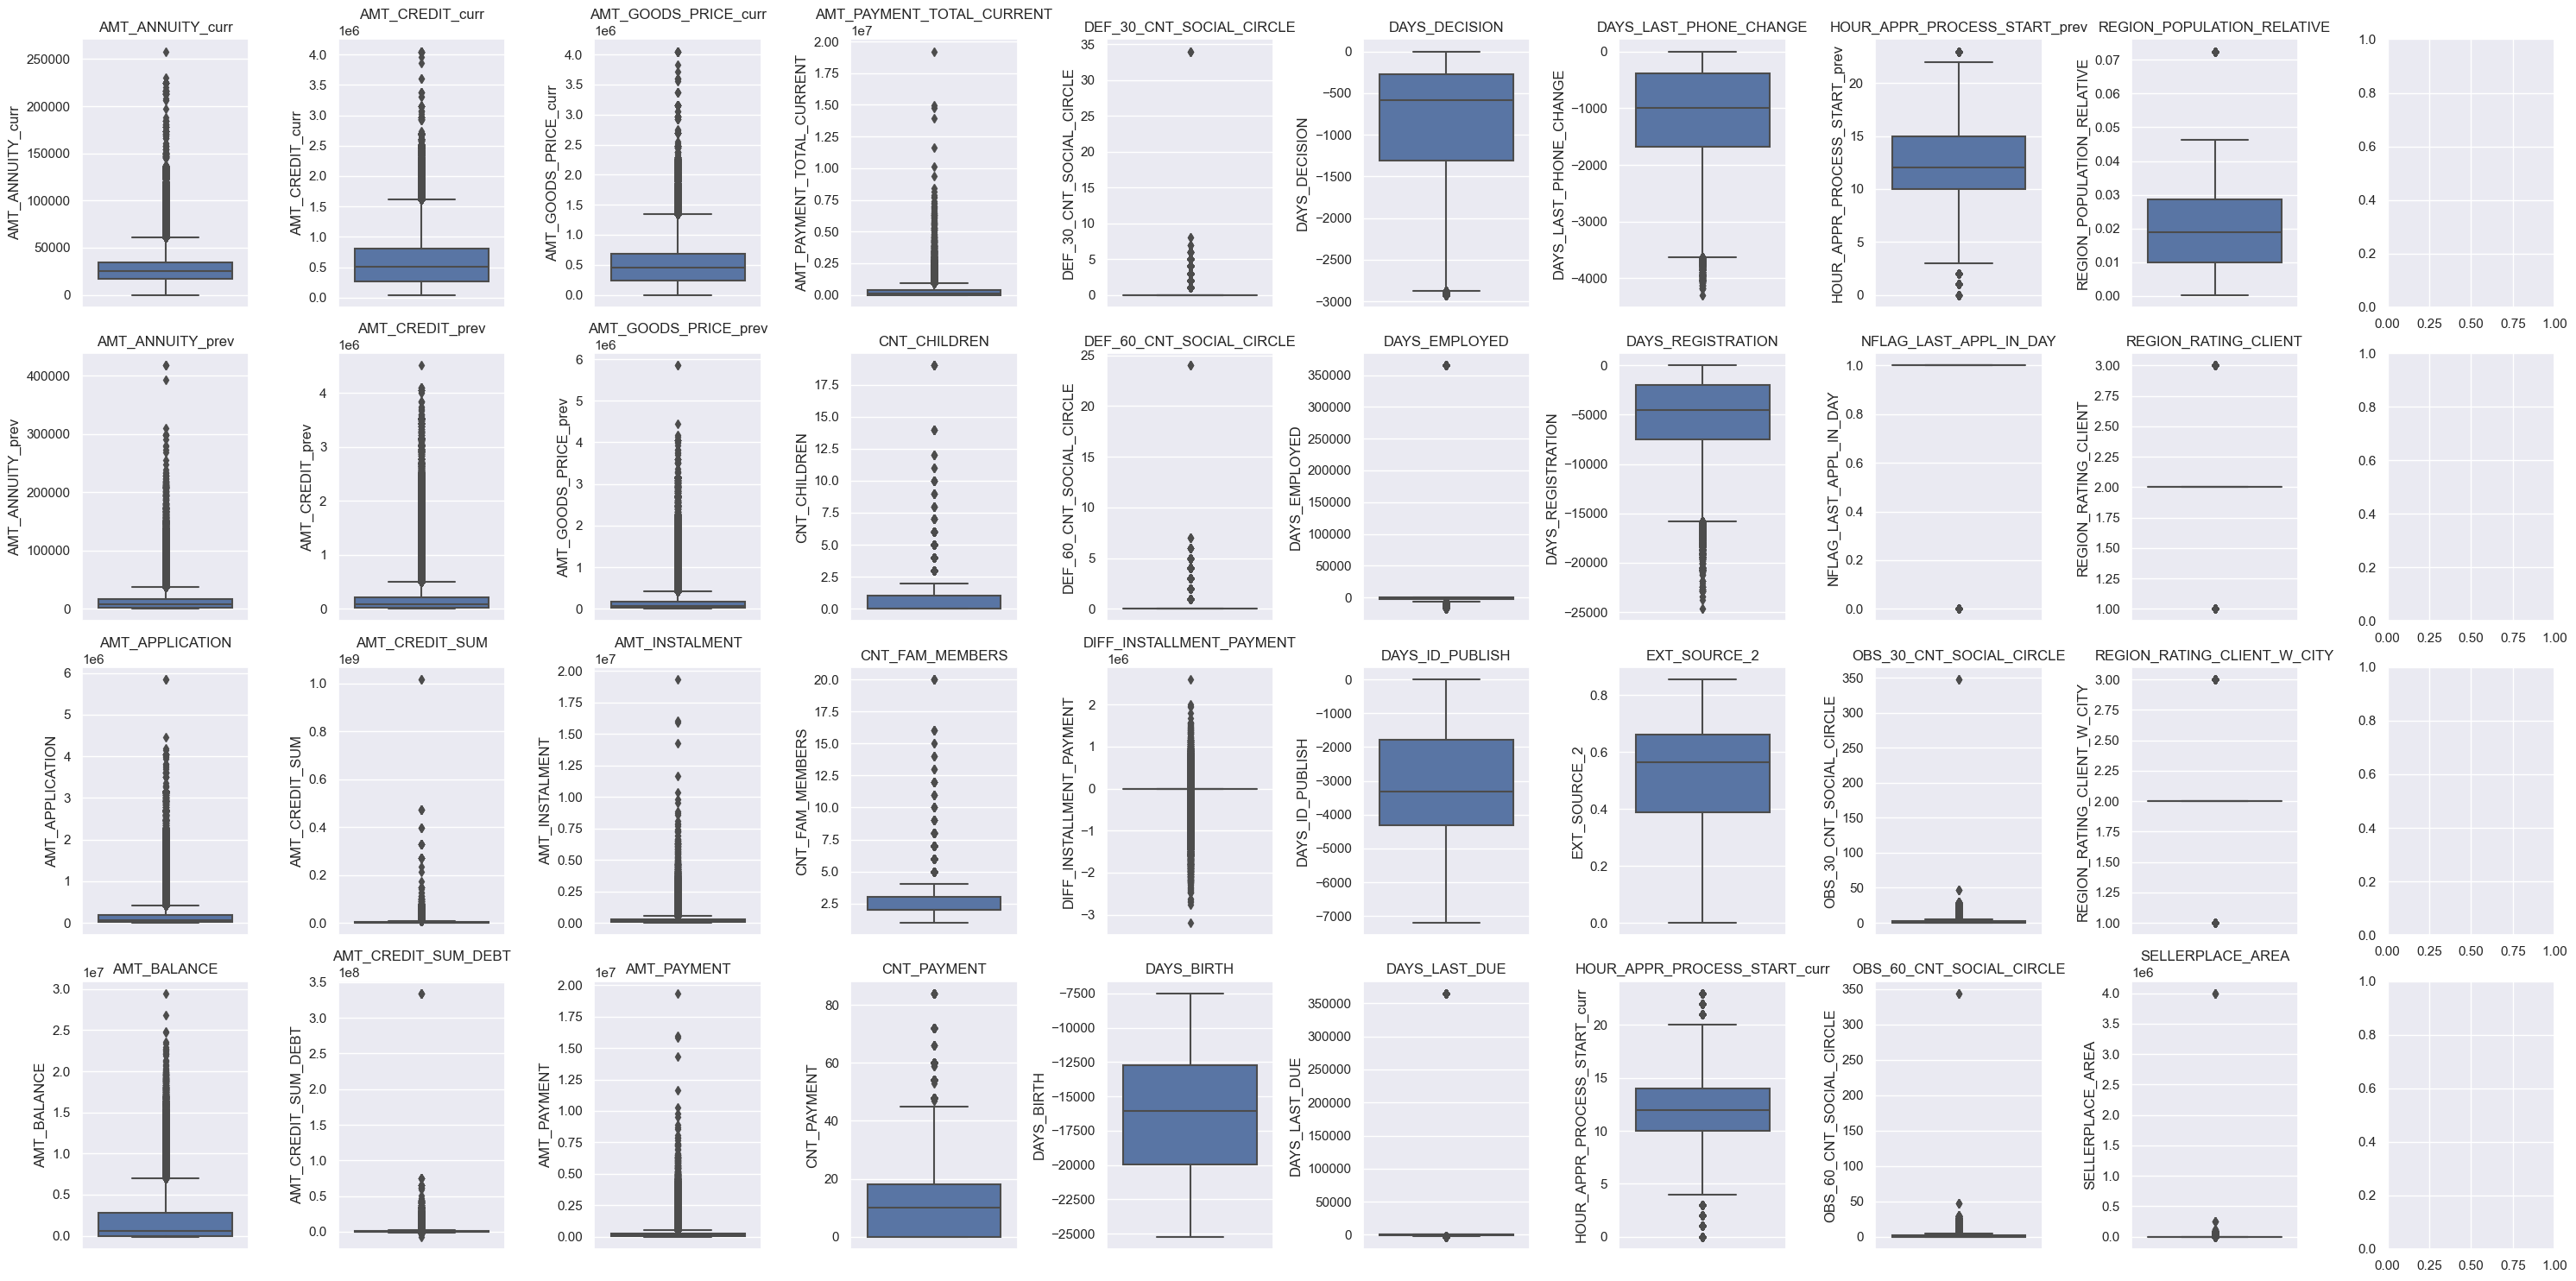

In [39]:
numerical_columns = df1_train[[
    'AMT_ANNUITY_curr', 'AMT_ANNUITY_prev', 'AMT_APPLICATION', 'AMT_BALANCE',
    'AMT_CREDIT_curr', 'AMT_CREDIT_prev', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
    'AMT_GOODS_PRICE_curr', 'AMT_GOODS_PRICE_prev', 'AMT_INSTALMENT', 'AMT_PAYMENT',
    'AMT_PAYMENT_TOTAL_CURRENT', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'CNT_PAYMENT',
    'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DIFF_INSTALLMENT_PAYMENT',
    'DAYS_BIRTH', 'DAYS_DECISION', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_LAST_DUE',
    'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'EXT_SOURCE_2', 'HOUR_APPR_PROCESS_START_curr',
    'HOUR_APPR_PROCESS_START_prev', 'NFLAG_LAST_APPL_IN_DAY', 'OBS_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE', 'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT',
    'REGION_RATING_CLIENT_W_CITY', 'SELLERPLACE_AREA'
]].copy()

# Mengelompokkan kolom ke dalam sublist sebanyak 4 kolom
colgroup = [numerical_columns.columns[n:n+4] for n in range(0, len(numerical_columns.columns), 4)]

# Membuat grid subplot 4x10
fig, axs = plt.subplots(4, 10, figsize=(30, 15))

# Iterasi untuk setiap grup kolom
for i, group in enumerate(colgroup):
    # Iterasi untuk setiap kolom dalam grup
    for j, column in enumerate(group):
        # Membuat boxplot untuk subplot yang sesuai
        sns.boxplot(y=numerical_columns[column], ax=axs[j, i], linewidth=1.5, orient='v')
        axs[j, i].set_title(column)

# Menampilkan plot
plt.tight_layout()
plt.show()

## 2.3 Data Exploration

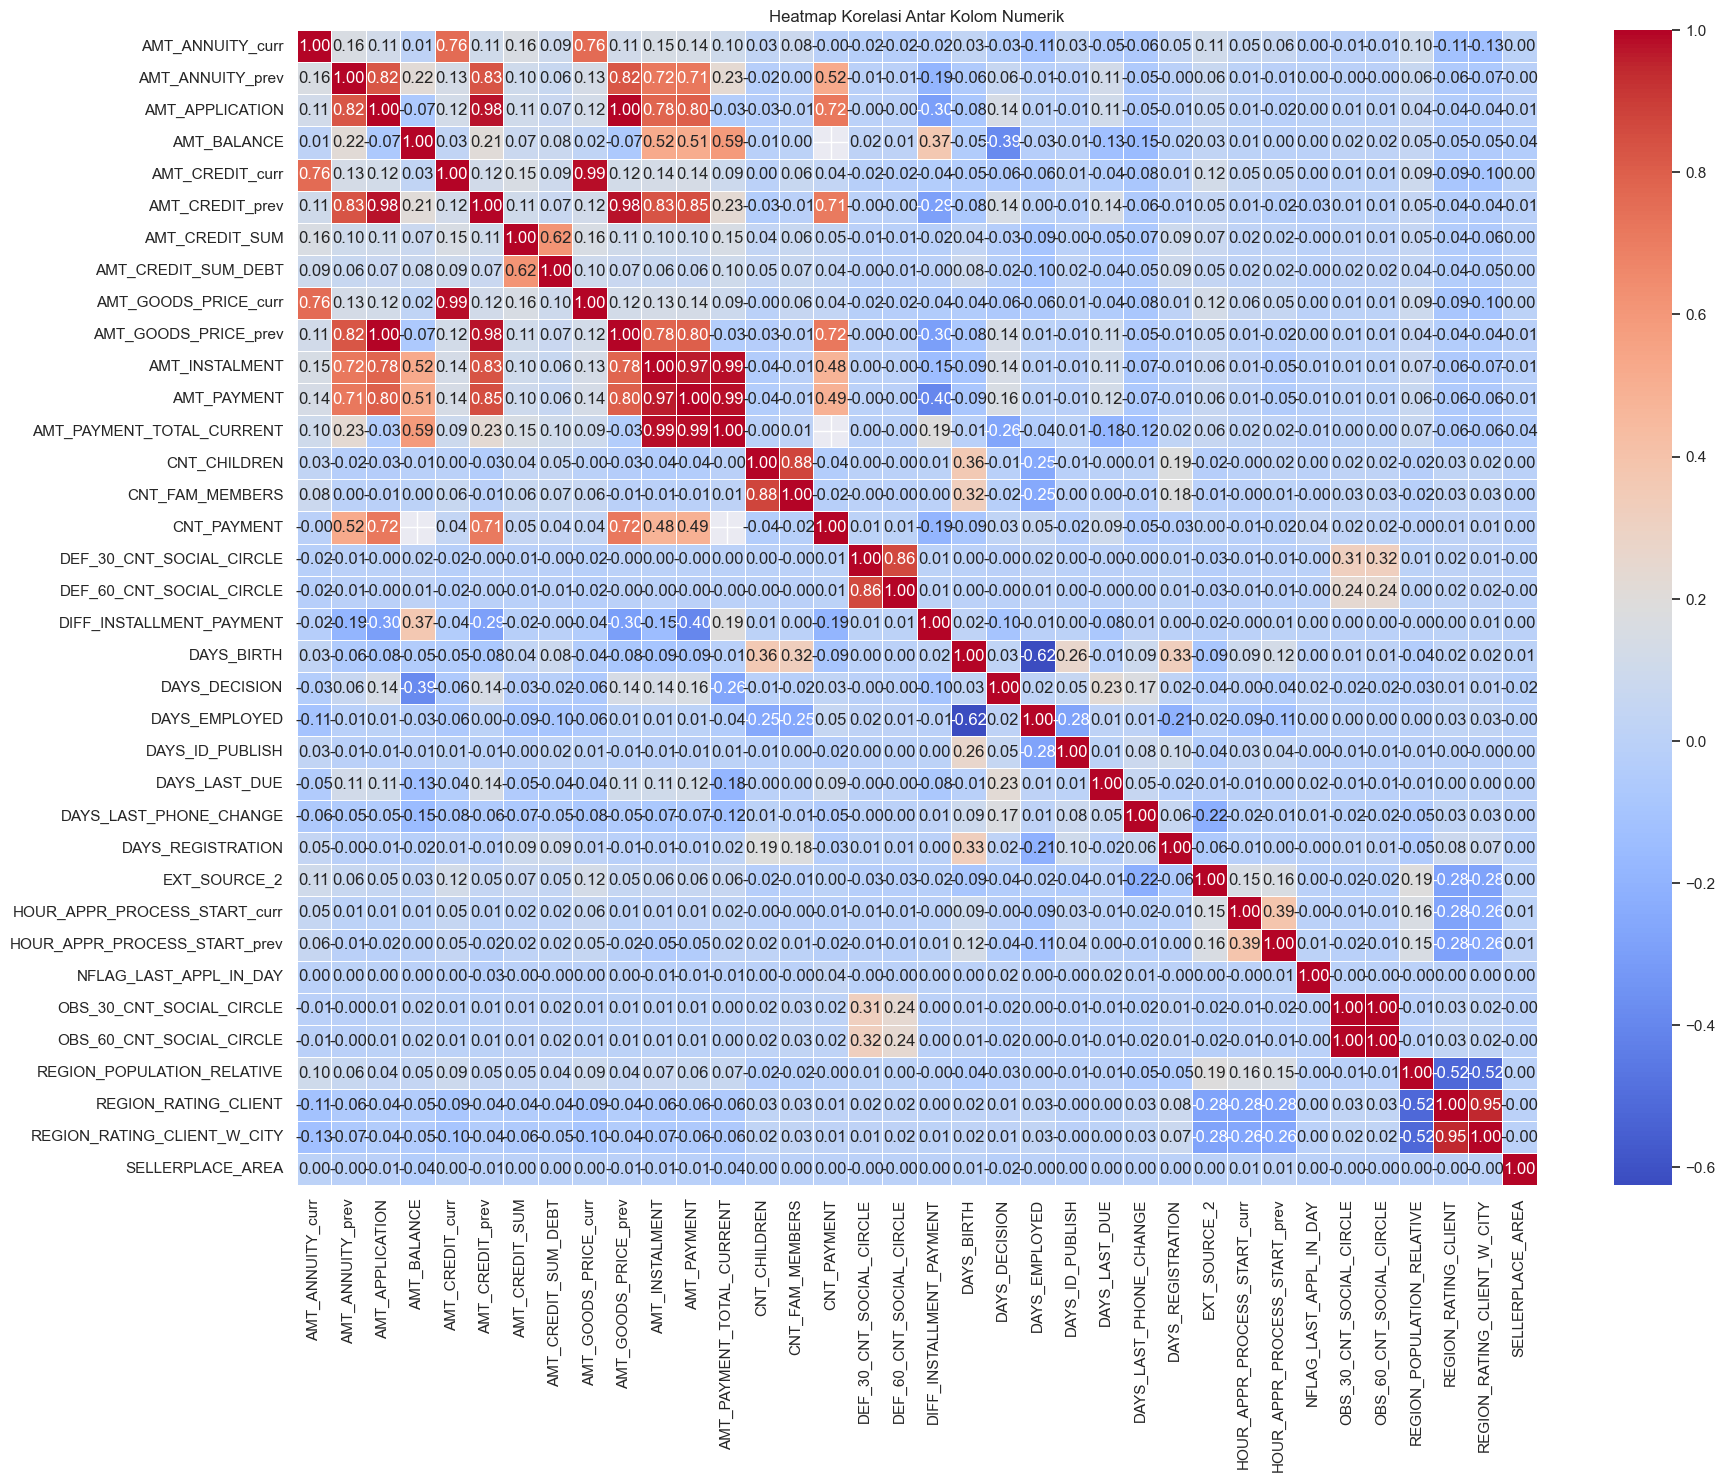

In [40]:
# Menghitung korelasi antar kolom numerik
correlation_matrix = numerical_columns.corr()

# Membuat heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Antar Kolom Numerik')
plt.show()

### 2.3.1 Income Source of Applicants

In [41]:
# Hitung frekuensi setiap jenis sumber pendapatan
temp = df1_train["NAME_INCOME_TYPE"].value_counts()

# Buat dataframe dari hasil penghitungan
df = pd.DataFrame({'labels': temp.index, 'values': temp.values})

# Pilih palet warna yang diinginkan
# Contoh dengan palet warna berurutan
fig = px.pie(df, names='labels', values='values',title='Income Source of Applicants', hole=0.5,
             color_discrete_sequence=px.colors.sequential.Plasma)

# Tampilkan diagram pie
fig.show()

- Mayoritas applicant memiliki sumber pendapatan dari pekerjaan atau menjadi mitra komersial, yang menunjukkan bahwa sebagian besar applicant aktif secara ekonomi.

- Proporsi pensiunan relatif tinggi, menandakan adanya applicant yang telah pensiun namun masih terlibat dalam proses aplikasi.

- Jumlah pegawai negeri dan mahasiswa yang lebih rendah mungkin menunjukkan bahwa kelompok ini cenderung kurang aktif dalam mengajukan pinjaman.

- Kehadiran individu yang menganggur, sedang cuti melahirkan, dan pengusaha dalam jumlah kecil dapat memberikan wawasan tambahan tentang diversitas situasi ekonomi applicant.

### 2.3.2 Family Status of Applicants

In [42]:
# Hitung frekuensi setiap jenis sumber pendapatan
temp_family_status = df1_train["NAME_FAMILY_STATUS"].value_counts()

# Buat dataframe dari hasil penghitungan
df = pd.DataFrame({'labels': temp_family_status.index, 'values': temp_family_status.values})

# Pilih palet warna yang diinginkan
# Contoh dengan palet warna berurutan
fig = px.pie(df, names='labels', values='values', title='Family Status of Applicants', hole=0.5,
             color_discrete_sequence=px.colors.sequential.Plasma)

# Tampilkan diagram pie
fig.show()

- Married: Kategori ini merupakan mayoritas dengan 64.4% dari total. Hal ini menunjukkan bahwa sebagian besar individu dalam dataset tersebut adalah yang sudah menikah.

- Single / Not Married: Kategori ini menyumbang 13.3% dari total. Ini menunjukkan bahwa terdapat persentase yang signifikan dari individu yang masih single atau belum menikah.

- Civil Marriage: Kategori ini mewakili 6.46% dari total. Ini mengindikasikan proporsi individu yang berada dalam perkawinan sipil.

- Separated: Kategori ini menyumbang 10.1% dari total. Ini menunjukkan persentase individu yang berpisah.

- Widow: Kategori ini menyumbang 5.76% dari total. Ini mengindikasikan proporsi individu yang berstatus janda.

### 2.3.3 Housing Type of Applicants

In [43]:
# Hitung frekuensi setiap jenis sumber pendapatan
temp_housing_type = df1_train["NAME_HOUSING_TYPE"].value_counts()

# Buat dataframe dari hasil penghitungan
df = pd.DataFrame({'labels': temp_housing_type.index, 'values': temp_housing_type.values})

# Pilih palet warna yang diinginkan
# Contoh dengan palet warna berurutan
fig = px.pie(df, names='labels', values='values', title='Housing Type of Applicants', hole=0.5,
             color_discrete_sequence=px.colors.sequential.Plasma)

# Tampilkan diagram pie
fig.show()

- Aplikan yang tinggal di rumah/apartemen sendiri mungkin dianggap lebih stabil secara finansial daripada yang tinggal di apartemen sewa.Sehingga lebih banyak yang mengajukan peminjaman. Dan mungkin, menunjukkan kemandirian finansial dan kemampuan untuk mengelola kewajiban finansial dengan baik.
Jika dibandingkan dengan Co-op apartment

### 2.3.4 Age Group of Applicants

In [44]:
# Hitung frekuensi setiap jenis sumber pendapatan
temp_age_group = df1_train["AGE_GROUP"].value_counts()

# Buat dataframe dari hasil penghitungan
df = pd.DataFrame({'labels': temp_age_group.index, 'values': temp_age_group.values})

# Pilih palet warna yang diinginkan
# Contoh dengan palet warna berurutan
fig = px.pie(df, names='labels', values='values', title='Age Group of Applicants', hole=0.5,
             color_discrete_sequence=px.colors.sequential.Plasma)

# Tampilkan diagram pie
fig.show()

- Kelompok usia 30 an merupakan kelompok yang dominan atau paling banyak mengajukan peminjaman dibandingkan kelompok applicants lainnya dan memiliki tingkat persetujuan kredit yang tinggi.
- Kelompok usia 30 an dengan proporsi 26.5% dari total applicants, menunjukkan kelompok usia ini cenderung lebih mapan secara finansial dan memiliki pengalaman dalam mengelola keuangan. Strategi pemasaran yang ditargetkan pada kelompok usia ini dapat mencakup penawaran kredit dengan limit yang lebih tinggi atau produk-produk investasi yang lebih kompleks.

### 2.3.5 Another Visualization

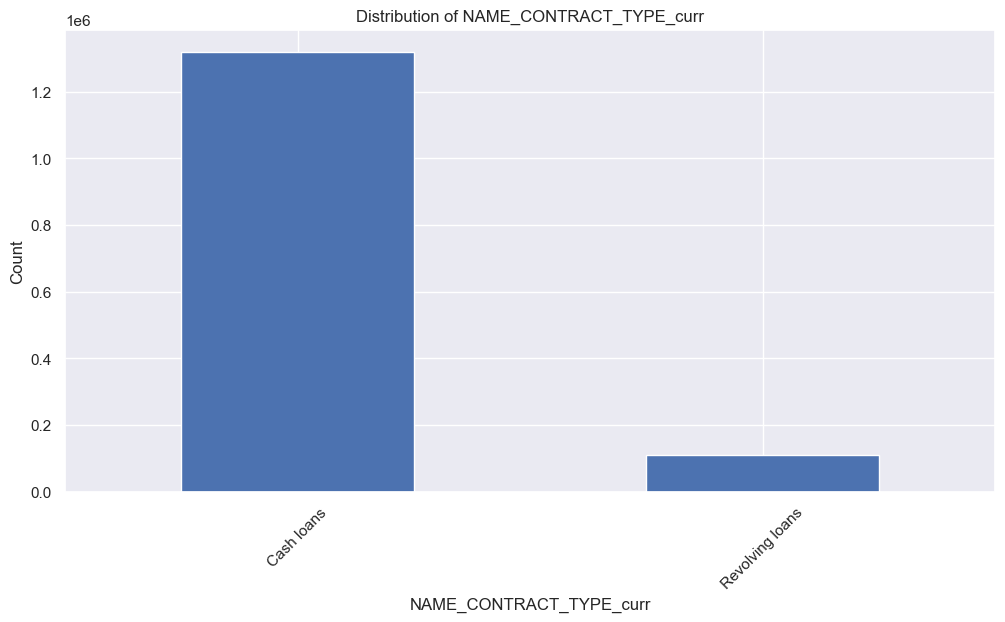

In [54]:
plt.figure(figsize=(12, 6))
df1_train['NAME_CONTRACT_TYPE_curr'].value_counts().plot(kind='bar')
plt.title('Distribution of NAME_CONTRACT_TYPE_curr')
plt.xlabel('NAME_CONTRACT_TYPE_curr')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [60]:
# Cari pasangan variabel dengan korelasi di atas 0.9
high_corr_pairs = [(col1, col2, round(correlation_matrix[col1][col2], 2)) 
                   for col1 in numerical_columns 
                   for col2 in numerical_columns 
                   if col1 < col2 and abs(correlation_matrix[col1][col2]) > 0.9]

if high_corr_pairs:
    print("Pasangan variabel dengan korelasi di atas 0.9:")
    for pair in high_corr_pairs:
        print(f"{pair[0]} dan {pair[1]} - Korelasi: {pair[2]}")
else:
    print("Tidak ada pasangan variabel dengan korelasi di atas 0.9.")


Pasangan variabel dengan korelasi di atas 0.9:
AMT_APPLICATION dan AMT_CREDIT_prev - Korelasi: 0.98
AMT_APPLICATION dan AMT_GOODS_PRICE_prev - Korelasi: 1.0
AMT_CREDIT_curr dan AMT_GOODS_PRICE_curr - Korelasi: 0.99
AMT_CREDIT_prev dan AMT_GOODS_PRICE_prev - Korelasi: 0.98
AMT_INSTALMENT dan AMT_PAYMENT - Korelasi: 0.97
AMT_INSTALMENT dan AMT_PAYMENT_TOTAL_CURRENT - Korelasi: 0.99
AMT_PAYMENT dan AMT_PAYMENT_TOTAL_CURRENT - Korelasi: 0.99
OBS_30_CNT_SOCIAL_CIRCLE dan OBS_60_CNT_SOCIAL_CIRCLE - Korelasi: 1.0
REGION_RATING_CLIENT dan REGION_RATING_CLIENT_W_CITY - Korelasi: 0.95


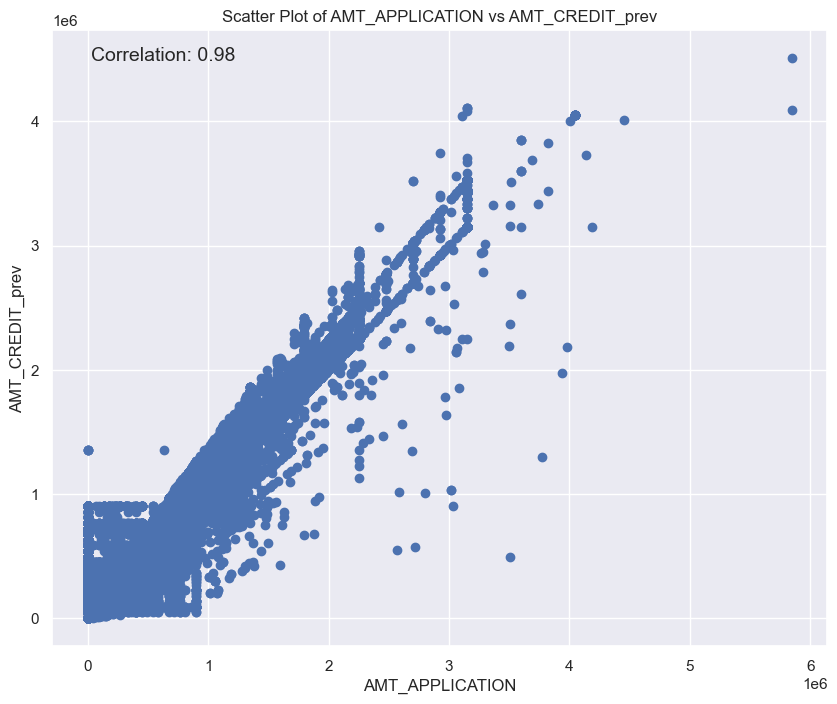

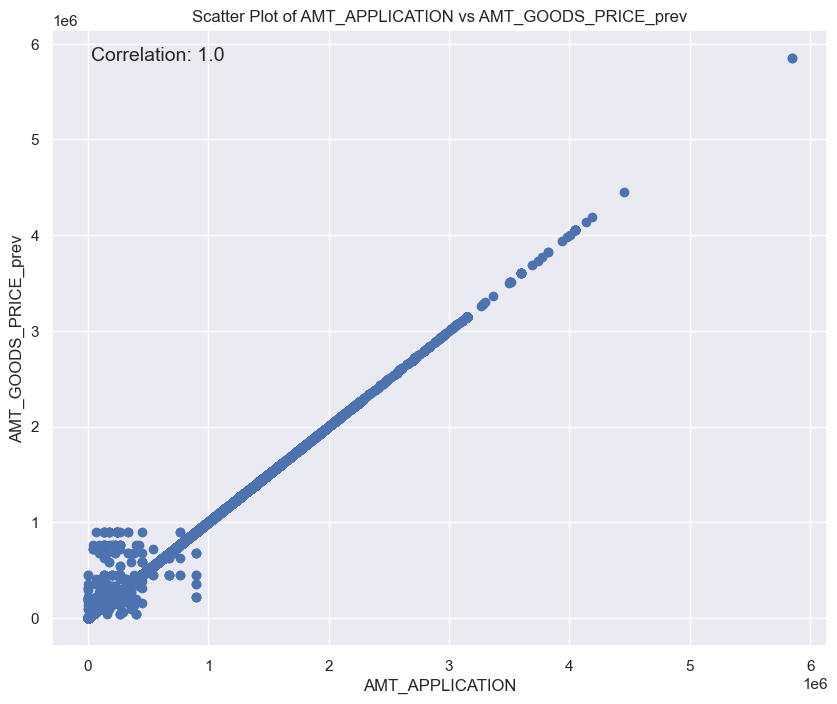

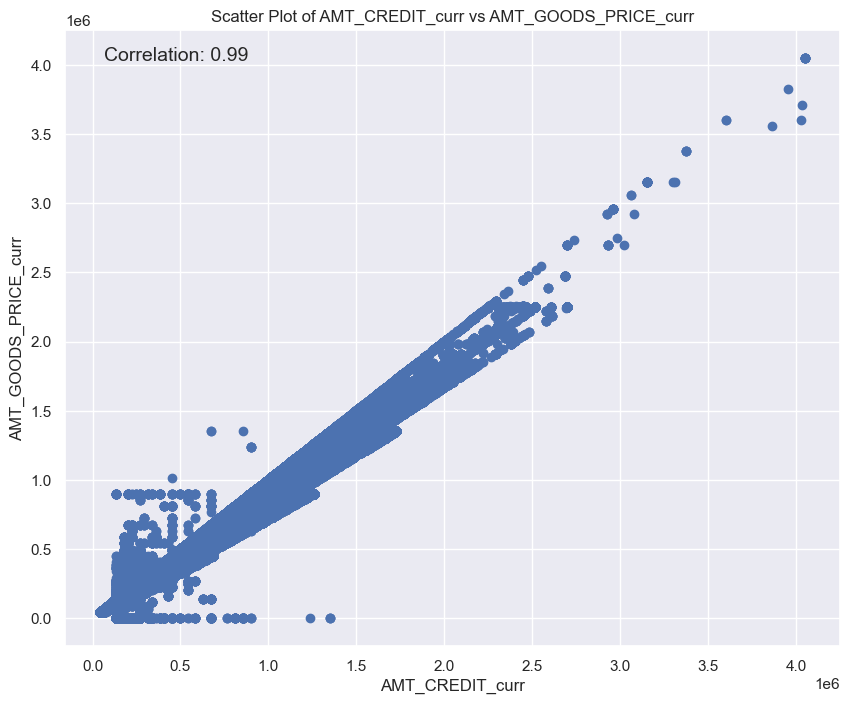

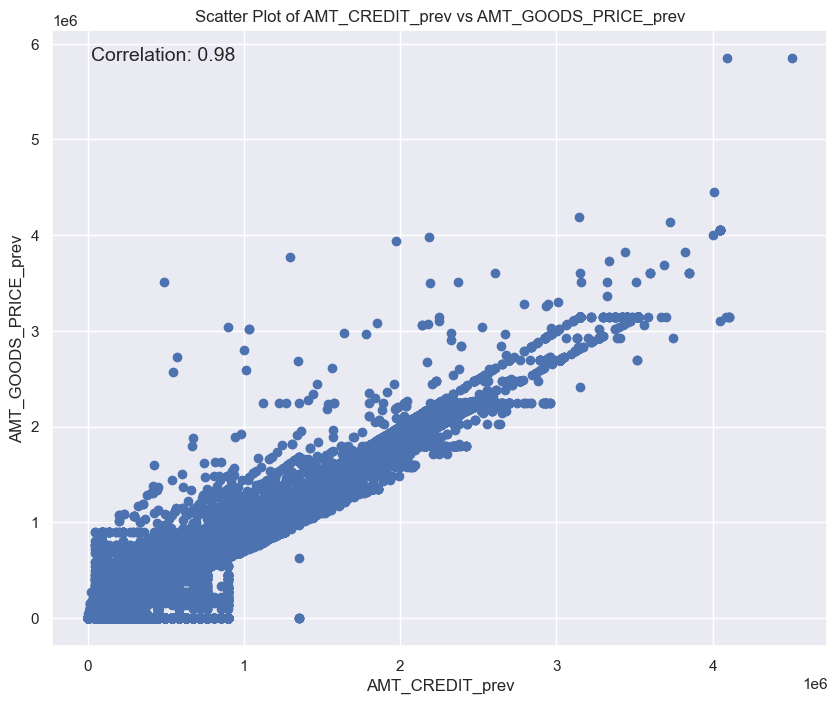

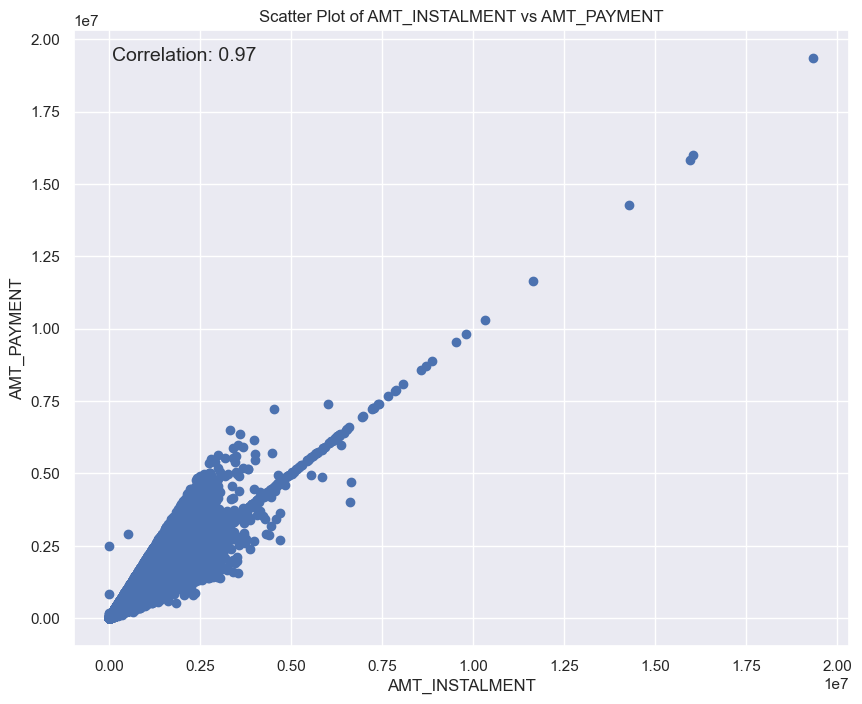

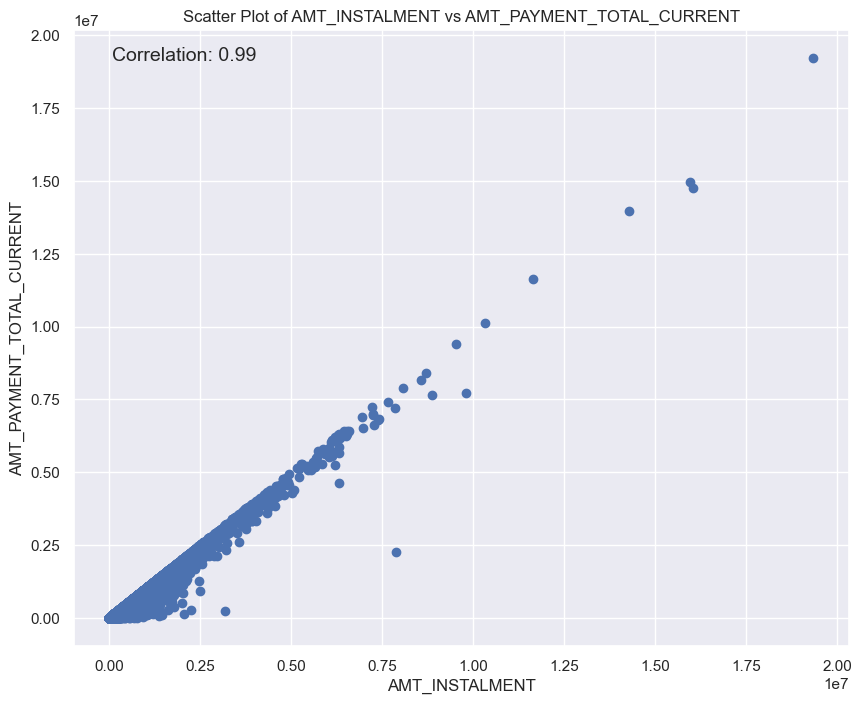

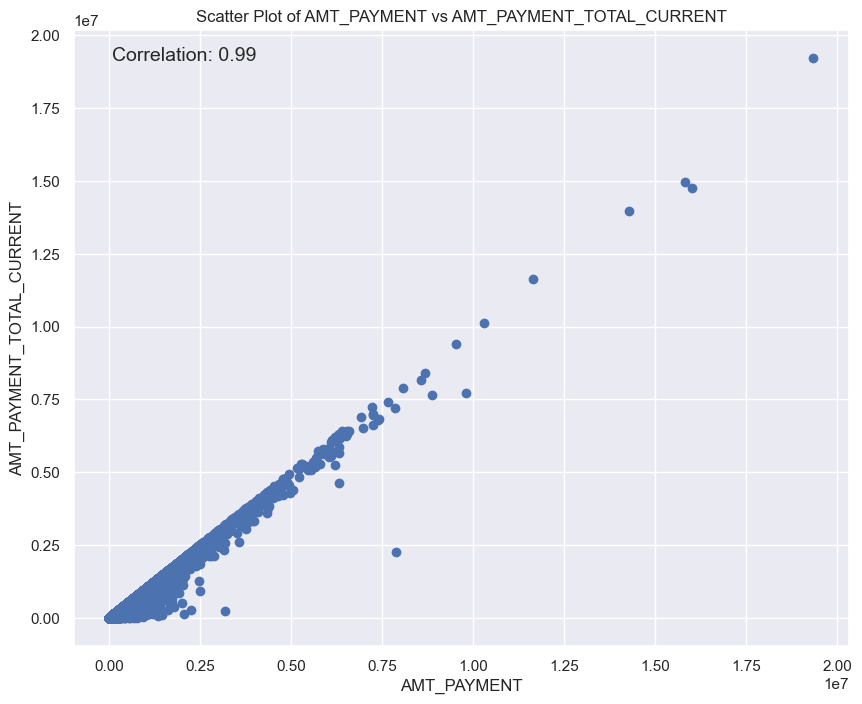

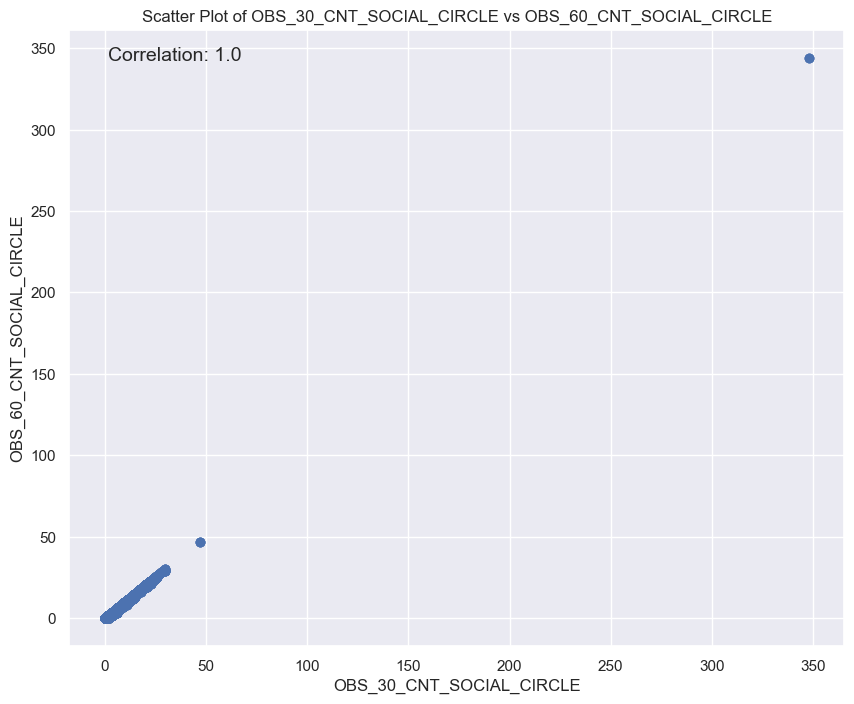

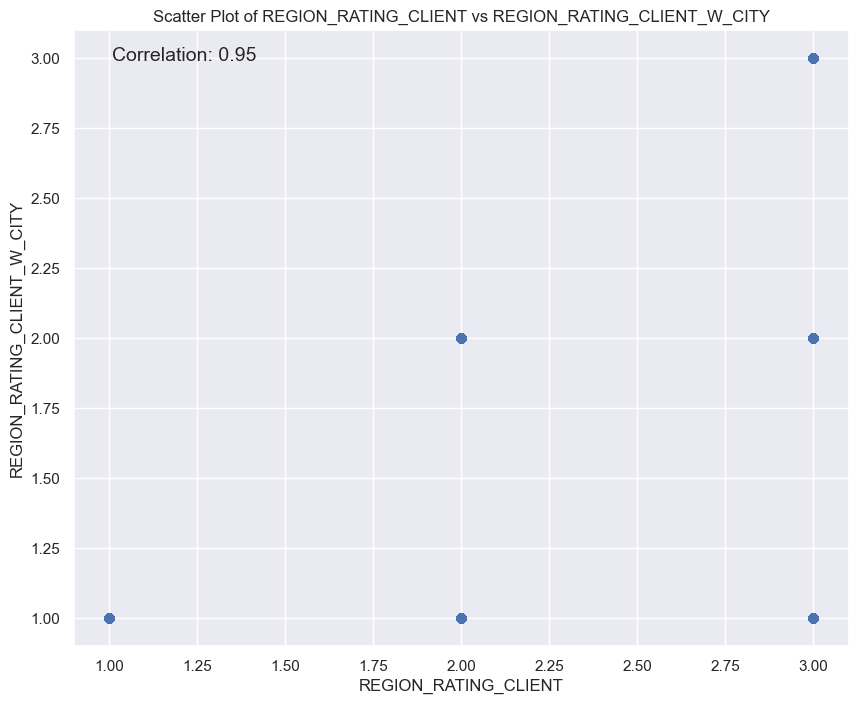

In [63]:
import matplotlib.pyplot as plt

for pair in high_corr_pairs:
    plt.figure(figsize=(10, 8))
    plt.scatter(df1_train[pair[0]], df1_train[pair[1]])
    plt.title(f"Scatter Plot of {pair[0]} vs {pair[1]}")
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.text(0.05, 0.95, f"Correlation: {pair[2]}", transform=plt.gca().transAxes, fontsize=14)
    plt.show()


In [69]:
# Hitung frekuensi setiap jenis sumber pendapatan
temp_contract = df1_train["NAME_CONTRACT_TYPE_curr"].value_counts()

# Buat dataframe dari hasil penghitungan
df = pd.DataFrame({'labels': temp_contract.index, 'values': temp_contract.values})

# Pilih palet warna yang diinginkan
# Contoh dengan palet warna berurutan
fig = px.pie(df, names='labels', values='values', title='Contract Type of Applicants', hole=0.5,
             color_discrete_sequence=px.colors.sequential.Plasma)

# Tampilkan diagram pie
fig.show()

In [70]:
df1_train

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_curr CODE_GENDER FLAG_OWN_CAR  \
0            100002       1              Cash loans           M            N   
1            100003       0              Cash loans           F            N   
2            100003       0              Cash loans           F            N   
3            100003       0              Cash loans           F            N   
4            100004       0         Revolving loans           M            Y   
...             ...     ...                     ...         ...          ...   
1429837      456255       0              Cash loans           F            N   
1429838      456255       0              Cash loans           F            N   
1429839      456255       0              Cash loans           F            N   
1429840      456255       0              Cash loans           F            N   
1429841      456255       0              Cash loans           F            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_curr  \
0                     Y             0          202500.0         406597.5   
1                     N             0          270000.0        1293502.5   
2                     N             0          270000.0        1293502.5   
3                     N             0          270000.0        1293502.5   
4                     Y             0           67500.0         135000.0   
...                 ...           ...               ...              ...   
1429837               N             0          157500.0         675000.0   
1429838               N             0          157500.0         675000.0   
1429839               N             0          157500.0         675000.0   
1429840               N             0          157500.0         675000.0   
1429841               N             0          157500.0         675000.0   

         AMT_ANNUITY_curr  AMT_GOODS_PRICE_curr NAME_TYPE_SUITE_curr  \
0                 24700.5              351000.0        Unaccompanied   
1                 35698.5             1129500.0               Family   
2                 35698.5             1129500.0               Family   
3                 35698.5             1129500.0               Family   
4                  6750.0              135000.0        Unaccompanied   
...                   ...                   ...                  ...   
1429837           49117.5              675000.0        Unaccompanied   
1429838           49117.5              675000.0        Unaccompanied   
1429839           49117.5              675000.0        Unaccompanied   
1429840           49117.5              675000.0        Unaccompanied   
1429841           49117.5              675000.0        Unaccompanied   

             NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0                     Working  Secondary / secondary special   
1               State servant               Higher education   
2               State servant               Higher education   
3               State servant               Higher education   
4                     Working  Secondary / secondary special   
...                       ...                            ...   
1429837  Commercial associate               Higher education   
1429838  Commercial associate               Higher education   
1429839  Commercial associate               Higher education   
1429840  Commercial associate               Higher education   
1429841  Commercial associate               Higher education   

           NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0        Single / not married  House / apartment                    0.018801   
1                     Married  House / apartment                    0.003541   
2                     Married  House / apartment                    0.003541   
3                     Married  House / apartment                    0.003541   
4        Single / not married  House / apartment                    0.010032   
...                  

In [71]:
df1_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1429840 entries, 0 to 1429841
Data columns (total 91 columns):
 #   Column                           Non-Null Count    Dtype   
---  ------                           --------------    -----   
 0   SK_ID_CURR                       1429840 non-null  int64   
 1   TARGET                           1429840 non-null  int64   
 2   NAME_CONTRACT_TYPE_curr          1429840 non-null  object  
 3   CODE_GENDER                      1429785 non-null  object  
 4   FLAG_OWN_CAR                     1429840 non-null  object  
 5   FLAG_OWN_REALTY                  1429840 non-null  object  
 6   CNT_CHILDREN                     1429840 non-null  int64   
 7   AMT_INCOME_TOTAL                 1429840 non-null  float64 
 8   AMT_CREDIT_curr                  1429840 non-null  float64 
 9   AMT_ANNUITY_curr                 1429840 non-null  float64 
 10  AMT_GOODS_PRICE_curr             1429840 non-null  float64 
 11  NAME_TYPE_SUITE_curr             1429840 n

# 3. Data Processing

In [72]:
X = df1_train.drop(columns='TARGET', axis=1)
y = df1_train[['TARGET']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1000888, 90) (428952, 90) (1000888, 1) (428952, 1)


Fungsi 'toad.quality' digunakan untuk mengevaluasi kualitas fitur dalam dataset berdasarkan beberapa metrik. Dalam hal ini, digunakan untuk menghitung Information Value (IV) dari setiap fitur dalam dataset X_train dengan target y_train ['TARGET'].

In [73]:
toad.quality(X_train, target=y_train['TARGET'], iv_only=True)

iv  gini  entropy    unique
EXT_SOURCE_2                 2.905958e-01   NaN      NaN  115511.0
DAYS_EMPLOYED                1.004475e-01   NaN      NaN   12375.0
AMT_GOODS_PRICE_curr         8.943251e-02   NaN      NaN     968.0
DAYS_BIRTH                   7.666255e-02   NaN      NaN   17440.0
AGE                          7.586036e-02   NaN      NaN      49.0
...                                   ...   ...      ...       ...
FLAG_EMAIL                   1.390843e-04   NaN      NaN       2.0
LIVE_REGION_NOT_WORK_REGION  1.299484e-04   NaN      NaN       2.0
REG_REGION_NOT_LIVE_REGION   1.145471e-04   NaN      NaN       2.0
FLAG_MOBIL                   2.479322e-05   NaN      NaN       2.0
FLAG_CONT_MOBILE             5.504648e-08   NaN      NaN       2.0

[90 rows x 4 columns]

- iv: Information Value (IV) dari masing-masing fitur. IV digunakan untuk mengukur kemampuan diskriminatif dari fitur terhadap target variabel. Nilai yang lebih tinggi menunjukkan bahwa fitur tersebut lebih informatif.

- gini: Nilai Gini yang mengukur ketidakseimbangan distribusi. Dalam output ini, nilai Gini tidak dihitung (dalam bentuk NaN) karena iv_only=True.

- entropy: Entropy yang mengukur ketidakpastian atau disorder dalam distribusi data. Dalam output ini, nilai Entropy tidak dihitung (NaN) karena iv_only=True.

- unique: Jumlah nilai unik yang terdapat dalam setiap fitur. Ini memberikan informasi tentang seberapa bervariasi nilai dalam fitur tersebut.

In [74]:
# Seleksi Fitur
Xtrain_selected, drop_list = toad.selection.select(
    frame=X_train,
    target=y_train['TARGET'],
    empty=0.5,
    iv=0.02,
    corr=0.7,
    return_drop=True
)

In [75]:
# Output Hasil Seleksi
print("keep:", Xtrain_selected.shape[1],
      "drop empty:", len(drop_list['empty']),
      "drop iv:", len(drop_list['iv']),
      "drop corr:", len(drop_list['corr']))

keep: 29 drop empty: 7 drop iv: 47 drop corr: 7


- keep: Jumlah fitur yang dipertahankan.
- drop empty: Jumlah fitur yang dihapus karena nilai kosong.
- drop iv: Jumlah fitur yang dihapus karena IV rendah.
- drop corr: Jumlah fitur yang dihapus karena korelasi tinggi

In [76]:
# Menampilkan Hasil
display(Xtrain_selected)
print(f'\n{drop_list}')

CODE_GENDER  AMT_GOODS_PRICE_curr      NAME_INCOME_TYPE  \
772595            F              612000.0               Working   
20376             F              270000.0  Commercial associate   
1086888           M              171000.0               Working   
1418976           M              454500.0               Working   
662136            M              418500.0               Working   
...             ...                   ...                   ...   
259179            M              652500.0               Working   
1414416           F              270000.0               Working   
131932            F              697500.0  Commercial associate   
671156            F              454500.0               Working   
121958            F              819000.0  Commercial associate   

                   NAME_EDUCATION_TYPE  REGION_POPULATION_RELATIVE  \
772595   Secondary / secondary special                    0.019689   
20376                 Higher education                    0.031329   
1086888  Secondary / secondary special                    0.024610   
1418976  Secondary / secondary special                    0.020246   
662136   Secondary / secondary special                    0.022625   
...                                ...                         ...   
259179   Secondary / secondary special                    0.002506   
1414416  Secondary / secondary special                    0.022625   
131932                Higher education                    0.025164   
671156   Secondary / secondary special                    0.028663   
121958   Secondary / secondary special                    0.006629   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
772595       -15152          -2720            -5179.0            -4136   
20376         -8421          -1622            -8394.0            -1086   
1086888      -21363          -1909            -1607.0            -4911   
1418976      -15697          -2739             -963.0            -2999   
662136        -9239           -296            -3742.0            -1774   
...             ...            ...                ...              ...   
259179       -18778          -1645             -573.0            -1969   
1414416       -9615          -1315            -2379.0             -860   
131932       -19616          -3117            -6763.0            -3102   
671156       -16871           -372            -4780.0             -421   
121958       -17219          -2979            -9934.0             -769   

         REGION_RATING_CLIENT_W_CITY  REG_CITY_NOT_WORK_CITY  \
772595                             2                       0   
20376                              2                       0   
1086888                            2                       0   
1418976                            3                       0   
662136                             2                       1   
...                              ...                     ...   
259179                             2                       0   
1414416                            2                       0   
131932                             2                       0   
671156                             2                       1   
121958                             2                       0   

              ORGANIZATION_TYPE  EXT_SOURCE_2  DAYS_LAST_PHONE_CHANGE  \
772595   Business Entity Type 3      0.598490                 -2924.0   
20376    Business Entity Type 3      0.619734                  -288.0   
1086888       Transport: type 4      0.395878                  -512.0   
1418976                Security      0.593741                   -92.0   
662136         Industry: type 9      0.251506                  -560.0   
...                         ...           ...                     ...   
259179                  Housing      0.464418                  -292.0   
1414416  Business Entity Type 3      0.479289                  -786.0   
131932            Trade: type 7      0.660069  


{'empty': array(['NAME_CASH_LOAN_PURPOSE', 'CODE_REJECT_REASON',
       'NAME_GOODS_CATEGORY', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY',
       'AMT_BALANCE', 'AMT_PAYMENT_TOTAL_CURRENT'], dtype='<U25'), 'iv': array(['SK_ID_CURR', 'NAME_CONTRACT_TYPE_curr', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'NAME_TYPE_SUITE_curr', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START_curr',
       'HOUR_APPR_PROCESS_START_curr', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_CREDIT_SUM', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_prev',
       'AMT_ANNUITY_prev', 'AMT_APPLICATION', 'A

In [77]:
selected_features = Xtrain_selected.columns

X_test = X_test[selected_features]

In [78]:
def iv_importance(data_selected, label):
    iv_import_feat = toad.quality(data_selected, label, iv_only=True)
    iv_import_feat = iv_import_feat['iv']
    iv_import_feat = iv_import_feat.reset_index()
    iv_import_feat.columns = ['name', 'iv']
    return iv_import_feat

df_iv = iv_importance(Xtrain_selected, y_train['TARGET'])

df_iv.sort_values(by='iv', ascending=False)

name        iv
0                  EXT_SOURCE_2  0.290596
1                 DAYS_EMPLOYED  0.100448
2          AMT_GOODS_PRICE_curr  0.089433
3                    DAYS_BIRTH  0.076663
4           AMT_CREDIT_SUM_DEBT  0.070730
5             ORGANIZATION_TYPE  0.069954
6                     AGE_GROUP  0.068719
7              NAME_INCOME_TYPE  0.057552
8        DAYS_LAST_PHONE_CHANGE  0.057473
9   REGION_RATING_CLIENT_W_CITY  0.045541
10   REGION_POPULATION_RELATIVE  0.042345
11          PRODUCT_COMBINATION  0.042239
12           DAYS_FIRST_DRAWING  0.040361
13         NAME_CONTRACT_STATUS  0.040098
14              DAYS_ID_PUBLISH  0.039967
15    DAYS_LAST_DUE_1ST_VERSION  0.039704
16          NAME_EDUCATION_TYPE  0.037071
17               DAYS_FIRST_DUE  0.036474
18     DIFF_INSTALLMENT_PAYMENT  0.036052
19                DAYS_LAST_DUE  0.035809
20                  AVERAGE_DPD  0.034659
21                  CODE_GENDER  0.034146
22                  CNT_PAYMENT  0.032710
23            DAYS_REGISTRATION  0.029909
24       REG_CITY_NOT_WORK_CITY  0.029219
25                  AMT_PAYMENT  0.024859
26                DAYS_DECISION  0.024638
27             NAME_YIELD_GROUP  0.021591
28             AMT_DOWN_PAYMENT  0.020644

## 3.1 Merperbaiki Data Outlier

In [79]:
import numpy as np

def cap_outliers(df, columns):
    # Make a copy of the data to avoid changes to the original DataFrame
    result = df.copy()

    # Loop through each column in the given list
    for col in columns:
        # Calculate the first quartile (Q1) for the current column
        Q1 = result[col].quantile(0.25)
        # Calculate the third quartile (Q3) for the current column
        Q3 = result[col].quantile(0.75)
        # Calculate the Interquartile Range (IQR) for the current column
        IQR = Q3 - Q1
        # Calculate the lower bound for the current column
        lower_bound = Q1 - (1.5 * IQR)
        # Calculate the upper bound for the current column
        upper_bound = Q3 + (1.5 * IQR)
        # Replace values in the current column that are less than the lower bound with the lower bound
        result[col] = np.where(result[col] < lower_bound, lower_bound, result[col])
        # Replace values in the current column that are greater than the upper bound with the upper bound
        result[col] = np.where(result[col] > upper_bound, upper_bound, result[col])
    
    # Return the DataFrame with capped outliers
    return result

# Selecting the names of all numeric columns in the DataFrame Xtrain_selected
outliers = Xtrain_selected.select_dtypes(include='number').columns
# Calling the cap_outliers function on Xtrain_selected, passing the names of numeric columns
# This will cap outliers in these columns, and the result is stored in Xtrain_selected
Xtrain_selected = cap_outliers(Xtrain_selected, outliers)


## 3.2 Feature Binning

In [80]:
# Gabungkan X_train dan y_train
train = pd.concat([Xtrain_selected, y_train], axis=1)

# Ambil sampel acak dari dataset gabungan
sample = train.sample(frac=0.25, random_state=1103)

# Buat objek Combiner dan fit menggunakan metode Decision Tree
c = toad.transform.Combiner()
c.fit(X=sample.drop('TARGET', axis=1), y=sample['TARGET'], method='dt', n_bins=None, empty_separate=True)

In [81]:
bins_output = c.export()
bins_output

{'CODE_GENDER': [['F'], ['nan'], ['M']],
 'AMT_GOODS_PRICE_curr': [151359.75,
  340299.0,
  450117.0,
  467937.0,
  676183.5,
  677889.0,
  690750.0,
  1258051.5,
  1334250.0],
 'NAME_INCOME_TYPE': [['Pensioner'],
  ['State servant'],
  ['Commercial associate'],
  ['Working'],
  ['Student', 'Businessman'],
  ['Maternity leave'],
  ['Unemployed']],
 'NAME_EDUCATION_TYPE': [['Academic degree'],
  ['Higher education'],
  ['Incomplete higher'],
  ['Secondary / secondary special'],
  ['Lower secondary']],
 'REGION_POPULATION_RELATIVE': [0.009020499885082245,
  0.009254499804228544,
  0.017320500686764717,
  0.018825500272214413,
  0.019394999369978905,
  0.021668999455869198,
  0.023705000057816505,
  0.0319449994713068,
  0.05141475051641464],
 'DAYS_BIRTH': [-23952.5,
  -20002.5,
  -14779.5,
  -14772.5,
  -11455.5,
  -11454.5,
  -8496.5,
  -8486.5,
  -8483.5],
 'DAYS_EMPLOYED': [-3993.5,
  -2419.5,
  -1789.5,
  -1382.5,
  -1377.5,
  -944.5,
  -943.5,
  -922.5,
  1764.5],
 'DAYS_REGISTRATI

## 3.3 Transformasi Weight of Evidence

Teknik ini dilakukan dalam analisis risiko kredit dan pemodelan skor kredit untuk mengubah fitur-fitur numerik menjadi nilai-nilai berdasarkan informasi yang terkandung dalam hubungan antara fitur-fitur tersebut dan target.

### 3.3.1 Inisialisasi Transformer WoE

Langkah pertama adalah menginisialisasi objek transformer WoE menggunakan toad.transform.WOETransformer(). Objek ini akan digunakan untuk mentransformasi fitur-fitur menjadi nilai WoE.

In [82]:
td = toad.transform.WOETransformer()

### 3.3.2 Transformasi Data ke Nilai WoE

Data diproses menggunakan transformer WoE yang telah di-fit dengan menggunakan metode fit_transform. Data pelatihan (Xtrain_selected) diubah menjadi nilai WoE yang sesuai dengan target (y_train['TARGET']).

In [83]:
Xtrain_selected_woe = td.fit_transform(c.transform(Xtrain_selected), y_train['TARGET'])

Xtest_selected_woe = td.fit_transform(c.transform(X_test), y_test['TARGET'])

In [84]:
iv = toad.quality(Xtrain_selected_woe, y_train['TARGET'], iv_only=True)

iv

iv  gini  entropy  unique
EXT_SOURCE_2                 0.282996   NaN      NaN    10.0
DAYS_EMPLOYED                0.098073   NaN      NaN    10.0
AMT_GOODS_PRICE_curr         0.086745   NaN      NaN    10.0
DAYS_BIRTH                   0.074698   NaN      NaN    10.0
AMT_CREDIT_SUM_DEBT          0.069091   NaN      NaN    11.0
AGE_GROUP                    0.068719   NaN      NaN     5.0
ORGANIZATION_TYPE            0.067564   NaN      NaN    10.0
NAME_INCOME_TYPE             0.057562   NaN      NaN     7.0
DAYS_LAST_PHONE_CHANGE       0.056123   NaN      NaN    10.0
REGION_POPULATION_RELATIVE   0.042244   NaN      NaN    10.0
PRODUCT_COMBINATION          0.041991   NaN      NaN    10.0
NAME_CONTRACT_STATUS         0.040098   NaN      NaN     5.0
DAYS_FIRST_DRAWING           0.039749   NaN      NaN    11.0
DAYS_ID_PUBLISH              0.039458   NaN      NaN    10.0
DAYS_LAST_DUE_1ST_VERSION    0.038917   NaN      NaN    11.0
NAME_EDUCATION_TYPE          0.037071   NaN      NaN     5.0
DAYS_FIRST_DUE               0.035839   NaN      NaN    11.0
DAYS_LAST_DUE                0.034993   NaN      NaN    11.0
CODE_GENDER                  0.034146   NaN      NaN     3.0
CNT_PAYMENT                  0.031350   NaN      NaN    11.0
DAYS_REGISTRATION            0.028063   NaN      NaN    10.0
AVERAGE_DPD                  0.026752   NaN      NaN     2.0
DAYS_DECISION                0.024152   NaN      NaN    11.0
AMT_PAYMENT                  0.023847   NaN      NaN    10.0
NAME_YIELD_GROUP             0.021591   NaN      NaN     5.0
DIFF_INSTALLMENT_PAYMENT     0.021414   NaN      NaN     2.0
AMT_DOWN_PAYMENT             0.001436   NaN      NaN     2.0
REG_CITY_NOT_WORK_CITY       0.000000   NaN      NaN     1.0
REGION_RATING_CLIENT_W_CITY  0.000000   NaN      NaN     1.0

# 4. Data Modelling

In [85]:
model = LogisticRegression()

In [86]:
def eval_model(model, X_train, y_train, X_test, y_test, thresshold):
    
    model.fit(X_train, y_train)

    pred_train = model.predict_proba(X_train)[:, 1]
    pred_test = model.predict_proba(X_test)[:, 1]

    # print auc score with roc auc score
    print('Train AUC:', roc_auc_score(y_train, pred_train))
    print('Test AUC:', roc_auc_score(y_test, pred_test))
    # print('Train AUC:', AUC(pred_train, y_train))
    # print('Test AUC:', AUC(pred_test, y_test))

    print('Train Recall:', recall_score(y_train, pred_train > thresshold))
    print('Test Recall:', recall_score(y_test, pred_test > thresshold))

    print('Train Precision:', precision_score(y_train, pred_train > thresshold))
    print('Test Precision:', precision_score(y_test, pred_test > thresshold))

    fig, ax = plt.subplots(figsize=(11, 5))
    
    fpr, tpr, _ = roc_curve(y_test, pred_test)
    roc_auc = roc_auc_score(y_test, pred_test)
    
        # Plot ROC Curve
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
    
    # Calculate the precision-recall curve points
    precision, recall, _ = precision_recall_curve(y_test, pred_test)
    
    # Calculate the average precision score
    avg_precision = average_precision_score(y_test, pred_test)
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label='Precision-Recall curve (Average Precision = %0.2f)' % avg_precision, color='orange')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

Train AUC: 0.7137475697756471
Test AUC: 0.7127856280481402
Train Recall: 0.7863544142368558
Test Recall: 0.7858030360326292
Train Precision: 0.1293536987487437
Test Precision: 0.12931559459303282


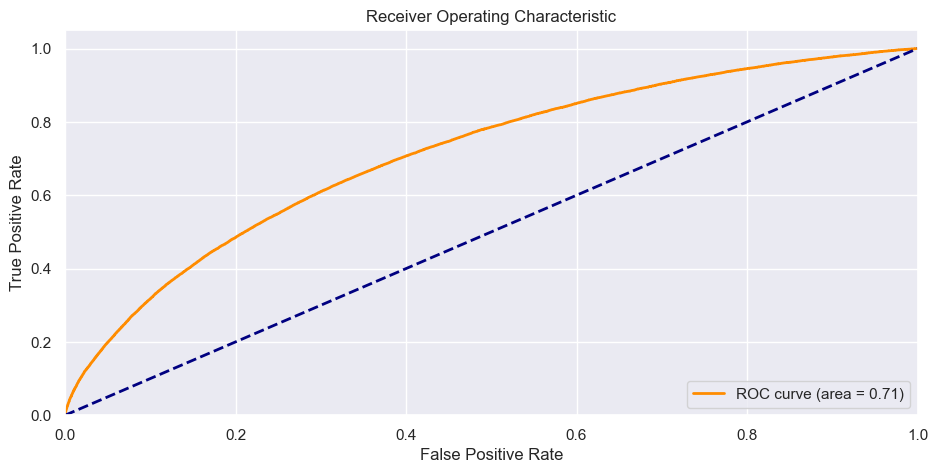

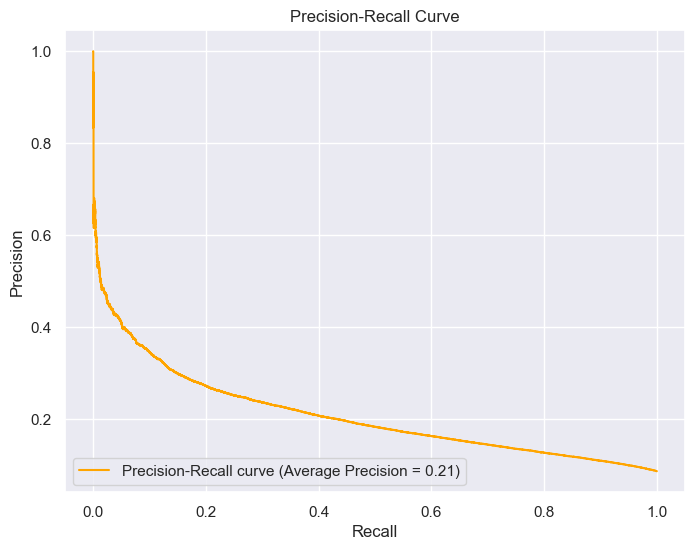

In [87]:
lr = LogisticRegression(random_state=1103, class_weight='balanced')
eval_model(lr, X_train=Xtrain_selected_woe, y_train=y_train, X_test=Xtest_selected_woe, y_test=y_test, thresshold=0.42)

[LightGBM] [Info] Number of positive: 86255, number of negative: 914633
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.340226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 250
[LightGBM] [Info] Number of data points in the train set: 1000888, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Train AUC: 0.7478128670931994
Test AUC: 0.727282110573583
Train Recall: 0.8046953799779722
Test Recall: 0.8149478688347469
Train Precision: 0.14080161312571507
Test Precision: 0.12983810581218208


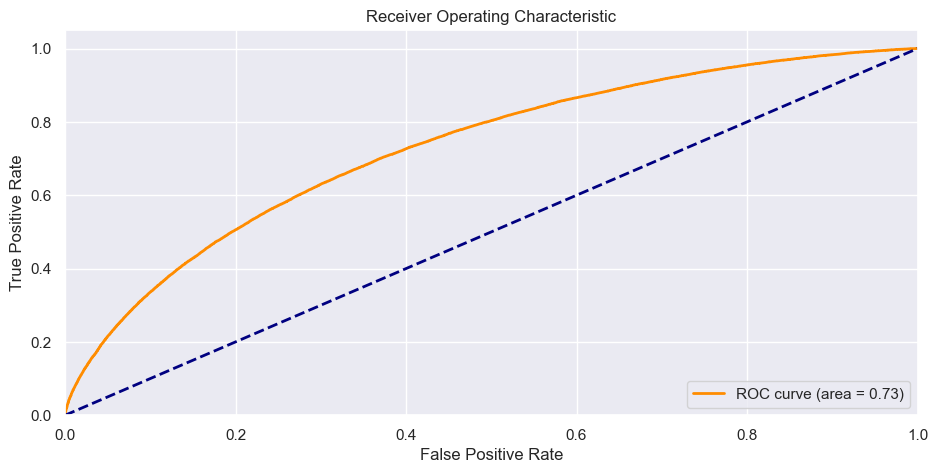

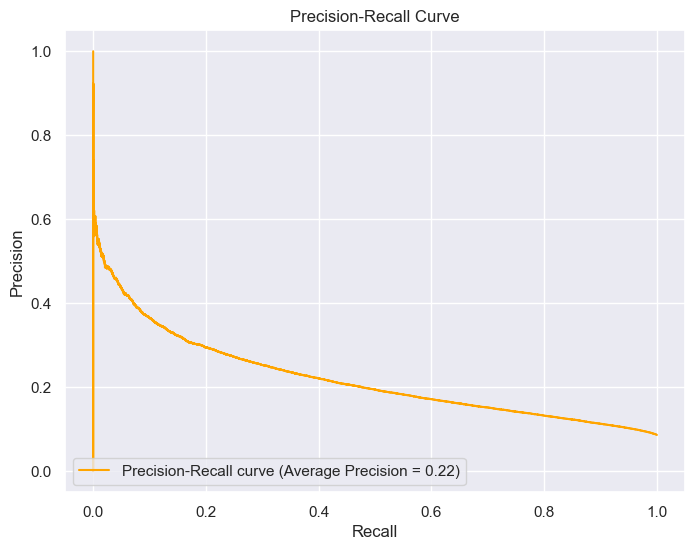

In [88]:
# Inisialisasi model LightGBM
lgbm = LGBMClassifier(n_estimators=100, random_state=1103, class_weight='balanced')

# Evaluasi model LightGBM
eval_model(lgbm, X_train=Xtrain_selected_woe, y_train=y_train, X_test=Xtest_selected_woe, y_test=y_test, thresshold=0.42)


In [90]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
import numpy as np

# Definisikan hyperparameter grid dengan rentang yang lebih kecil
num_leaves = [int(x) for x in np.linspace(start=20, stop=80, num=5)]
max_depth = [int(x) for x in np.linspace(5, 15, num=3)]

# Membuat grid parameter
random_grid = {'num_leaves': num_leaves, 'max_depth': max_depth}

# Inisialisasi model LightGBM
lgbm = LGBMClassifier(n_estimators=100, random_state=1103, class_weight='balanced')

# Gunakan cross-validation dengan lebih sedikit fold (misalnya, 3)
cv_folds = 3

# Pencarian parameter menggunakan RandomizedSearchCV dengan lebih sedikit iterasi
lgbm_result = RandomizedSearchCV(estimator=lgbm, param_distributions=random_grid, n_iter=5, cv=cv_folds, random_state=1103, n_jobs=-1)

# Fit model dengan pencarian parameter
lgbm_result.fit(Xtrain_selected_woe, y_train)

# Cetak parameter terbaik
print("Best parameters:", lgbm_result.best_params_)


[LightGBM] [Info] Number of positive: 86255, number of negative: 914633
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.313681 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 250
[LightGBM] [Info] Number of data points in the train set: 1000888, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best parameters: {'num_leaves': 80, 'max_depth': 10}


In [91]:
# logistic regression hyperparameter tuning
penalty = ['l1', 'l2']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver = ['liblinear', 'saga']

random_grid = {'penalty': penalty,
               'C': C,
               'solver': solver}

lr = LogisticRegression(random_state=1103, class_weight='balanced')
lr_result = RandomizedSearchCV(estimator=lr, param_distributions=random_grid, n_iter=50, cv=2, random_state=1103, n_jobs=-1)

lr_result.fit(Xtrain_selected_woe, y_train)
lr_result.best_params_

{'solver': 'saga', 'penalty': 'l1', 'C': 1}

# 5. Model Evaluation

Train AUC: 0.7137505868369132
Test AUC: 0.7127984451111283
Train Recall: 0.7862152918671381
Test Recall: 0.7858300469990817
Train Precision: 0.12938040873639708
Test Precision: 0.12938042550163653


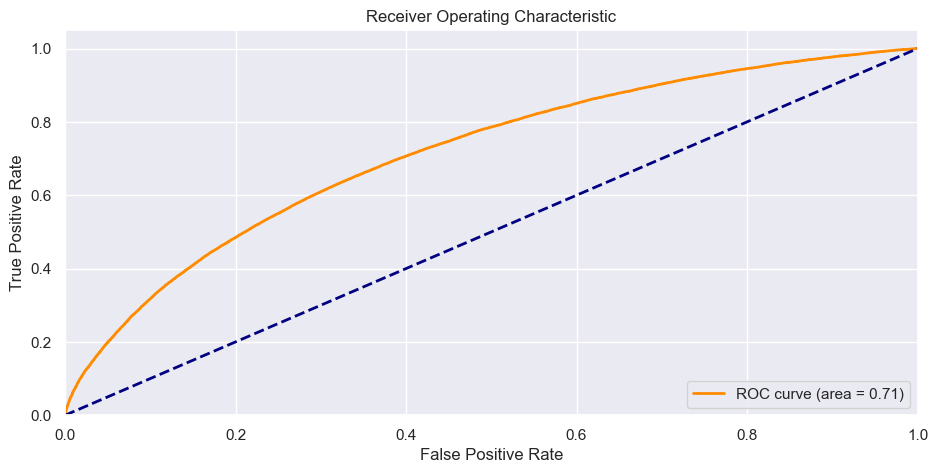

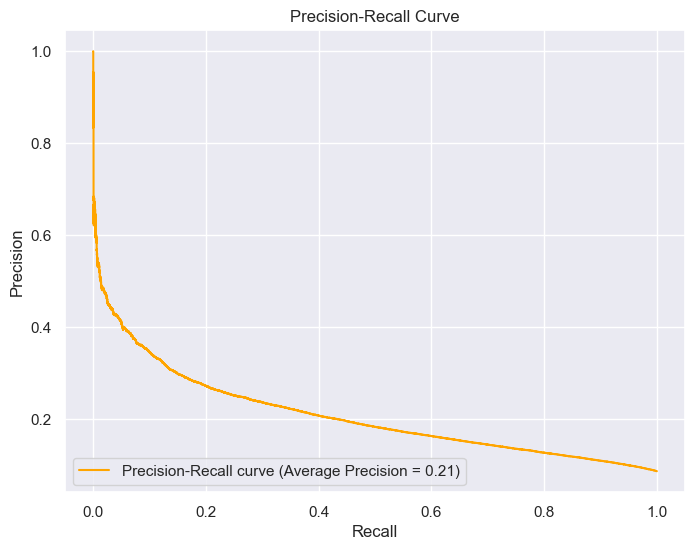

In [92]:
# Menetapkan parameter terbaik untuk regresi logistik
lr_tuned = LogisticRegression(random_state=1103, class_weight='balanced', **lr_result.best_params_)
eval_model(lr_tuned, X_train=Xtrain_selected_woe, y_train=y_train, X_test=Xtest_selected_woe, y_test=y_test, thresshold=0.42)

In [93]:
def df_model_score(model, X_train, y_train, X_test, y_test, threshold):
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_predict_proba = model.predict_proba(X_train)[:, 1]
    test_predic_proba = model.predict_proba(X_test)[:, 1]
    
    train_auc = roc_auc_score(y_train, train_preds)
    test_auc = roc_auc_score(y_test, test_preds)
    
    train_recall = recall_score(y_train, train_predict_proba > threshold)
    test_recall = recall_score(y_test, test_predic_proba > threshold)
    
    return train_auc, test_auc, train_recall, test_recall

# Menetapkan parameter terbaik untuk regresi logistik
lr_tuned = LogisticRegression(random_state=1103, class_weight='balanced', **lr_result.best_params_)
# Menetapkan hyperparameter untuk LGBM
lgbm_tuned = LGBMClassifier(random_state=1130, class_weight='balanced', **lgbm_result.best_params_)

# Evaluasi Model
lgbm_scores = df_model_score(lgbm_tuned, X_train=Xtrain_selected_woe, y_train=y_train, X_test=Xtest_selected_woe, y_test=y_test, threshold=0.42)
lr_scores = df_model_score(lr_tuned, X_train=Xtrain_selected_woe, y_train=y_train, X_test=Xtest_selected_woe, y_test=y_test, threshold=0.42)

scores_df = pd.DataFrame(data=[lgbm_scores, lr_scores], 
                         columns=['Train AUC', 'Test AUC', 'Train Recall', 'Test Recall'], 
                          index=['LGBM', 'Logistic Regression'])

scores_df

[LightGBM] [Info] Number of positive: 86255, number of negative: 914633
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.158381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 249
[LightGBM] [Info] Number of data points in the train set: 1000888, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Train AUC  Test AUC  Train Recall  Test Recall
LGBM                  0.705183  0.674894      0.826364     0.812166
Logistic Regression   0.656533  0.655687      0.786215     0.785830

## 5.1 Confusion Matrics

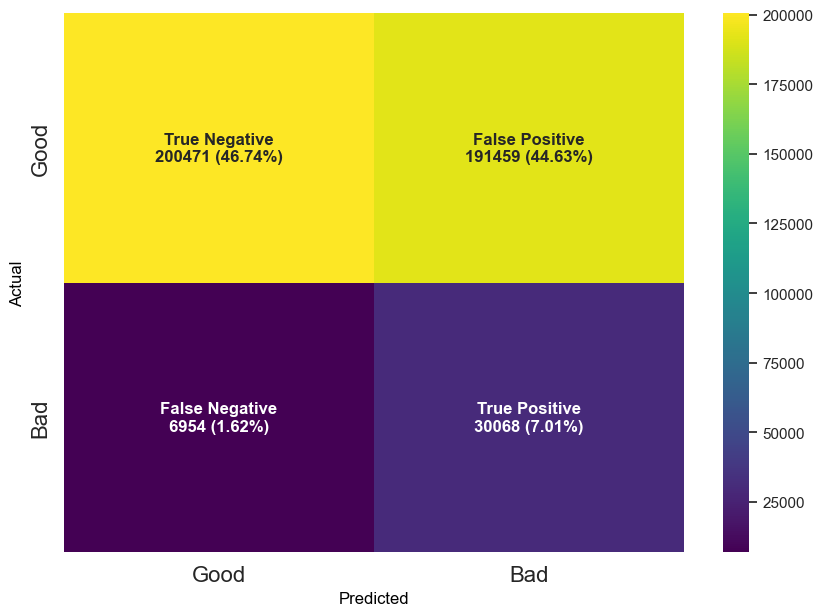

In [94]:
pred_test = lgbm_tuned.predict_proba(Xtest_selected_woe)[:, 1]

# Menghitung confusion matrix
cnf_matrix = confusion_matrix(y_test, pred_test > 0.42)

# Menghitung persentase matrix setiap kategori
percentage_matrix = cnf_matrix / cnf_matrix.sum()

# Menentukan label
labels = np.array([['True Negative', 'False Positive'],
                   ['False Negative', 'True Positive']])

# Buat label dengan jumlah dan persentase
new_labels = (np.asarray(["{0}\n{1} ({2:.2%})".format(label, value, percentage)
                          for label, value, percentage in zip(labels.flatten(), cnf_matrix.flatten(), percentage_matrix.flatten())])
             ).reshape(2,2)

# Plot confusion matrix menggunakan heatmap
fig = plt.figure(figsize=(10,7))
fig.patch.set_facecolor('white')  

sns.heatmap(cnf_matrix, annot=new_labels, fmt='', cmap='viridis', annot_kws={"weight": "bold"})

plt.xlabel('Predicted')
plt.ylabel('Actual')


plt.gca().xaxis.label.set_color('black')
plt.gca().yaxis.label.set_color('black')

plt.xticks(ticks=[0.5, 1.5], labels=['Good', 'Bad'], fontsize=16)
plt.yticks(ticks=[0.5, 1.5], labels=['Good', 'Bad'], fontsize=16)
plt.show()